## **MÜŞTERİLERDE CHURN ANALİTİĞİ VE SEGMENTASYON (MADDUCK/CALL RECORDER APP)**

### The Existing Columns in My Dataset

**1.originalTransactionId:** Unique identifiers for transactions that users make.

**2.userId:** Unique identifiers for users.

**3.Product Name:** Name or type of the product.

**4.Standard Subscription Duration:** Duration of the standard subscription.

**5.Intro Type:** Type of introduction for customers.

**6.Subscription Offer Duration**: Duration of the subscription offer provided to customers.

**7.Subscription Offer Type:** Type of subscription offer provided to customers.

**8.originalTransaction Date:** Date of the transaction.

**9.region:** Region or country where the user is located.

**10.continent:** Continent where the user is located.

**11.device.model:** Model of the iPhone device used by the user.

**12.device.iOSVersion:** iOS version of the iPhone model used by the user.

**13.language:** User's preferred application language.

**14.appVersion**: Version of the application used by the user.

**15.days_of_usage:** Number of days the user has used the application.

**16.CountBillRecovery:** Number of bills recovered from the customer during the product package period.

**17.Churn Date:** Churn date for customers who have churned.

**18.Churn:** Information about whether the customer has churned (1 = churn / 0 = non-churn customer).

**19.period_of_usage:** Period of usage for the product (duration of user engagement until the data cutoff date).

**20.PrimaryLastWeek:** Data related to a designated primary feature for the previous week.

**21.Primary_Avg_Weekly:** Weekly average of the designated primary feature.

**22.OpenLastWeek:** Data indicating how much interaction the customer had with the application in the last week.

**23.Open_Avg_Weekly:** Average data indicating how much interaction the customer had with the application in the last week.

#PROBLEM

Madduck şirketinin CallRecorder App'i için müşterilerin verilerine sahibiz ve bu veriler, müşteri davranışlarını anlamak ve müşteri churn (müşteri kaybı) oranlarını azaltmak amacıyla önemli bir analitik fırsat sunmaktadır. Bu proje, müşteri churn analitiği ve segmentasyonunu gerçekleştirerek, şirketin müşteri tabanının daha iyi anlaşılmasını ve makine öğrenmesi ile yeni müşterilerin churn olup olmayacağını tahminlemektedir.

In [ ]:
 # Gerekli kütüphaneleri içe aktarma
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score

!pip install catboost
from sklearn import svm
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# DATA UNDERSTANDING

## 1.Data Preprocessing

In [ ]:
df = pd.read_excel("/content/churn_table_final.xlsx")

In [ ]:
df.head()

,Unnamed: 0,originalTransactionId,userId,Product Name,Standard Subscription Duration,Intro Type,Subscription Offer Duration,Subscription Offer Type,originalTransaction Date,region,...,appVersion,days_of_usage,CountBillRecovery,Churn Date,Churn,period_of_usage,PrimaryLastWeek,Primary_Avg_Weekly,OpenLastWeek,Open_Avg_Weekly
0,0,500000796554960,002F4A9D-4EA4-418B-A54F-B9EBDAA33384,com.madduck.callrecorder.trialweek,7 Days,S,Non Duration,Non Offer,2021-03-27,DK,...,8.0.2,100,0,NaT,0,15,40,9.714286,1,1.142857
1,1,110001252039505,01237E20-1E43-4763-9B63-E7FD3F75680D,com.madduck.callrecorder.trialweek,7 Days,T,3 Days,Free Trial,2022-03-02,FR,...,8.1,262,0,2022-11-16,1,38,7,7.000000,5,5.000000
2,2,120001215201888,020B3799-DFE8-435D-A6F8-F0590BC62F56,com.madduck.callrecorder.yearlyv4,1 Year,T,3 Days,Free Trial,2021-11-01,JP,...,7.3.8,26,0,NaT,0,1,1,1.000000,2,2.000000
3,3,730000800372383,027BEF4E-5E46-4D32-B0DD-77886CAA9F4D,com.madduck.callrecorder.weekly,7 Days,T,3 Days,Free Trial,2022-01-18,FR,...,8.0.1,7,0,2022-09-19,1,1,1,2.000000,2,2.000000
4,4,730000677627699,02BBC8DE-E641-489C-B808-B633E82478B4,com.madduck.callrecorder.weekly,7 Days,T,3 Days,Free Trial,2021-06-25,US,...,8.2,98,1,2022-11-17,1,14,8,9.000000,2,5.285714


In [ ]:
# Veri setinin boyutlarına (satır ve sütun sayısı) bakma
num_rows, num_columns = df.shape
print("Veri Seti Boyutları: {} satır, {} sütun".format(num_rows, num_columns))

Veri Seti Boyutları: 305 satır, 24 sütun


In [ ]:
# Başta hangi sütunların bulunduğuna ve veri türlerine göz atma
print("\nSütun Başlıkları:")
df.columns


Sütun Başlıkları:


Index(['Unnamed: 0', 'originalTransactionId', 'userId', 'Product Name',
       'Standard Subscription Duration', 'Intro Type',
       'Subscription Offer Duration', 'Subscription Offer Type',
       'originalTransaction Date', 'region', 'continent', 'device.model',
       'device.iOSVersion', 'language', 'appVersion', 'days_of_usage',
       'CountBillRecovery', 'Churn Date', 'Churn', 'period_of_usage',
       'PrimaryLastWeek', 'Primary_Avg_Weekly', 'OpenLastWeek',
       'Open_Avg_Weekly'],
      dtype='object')

In [ ]:
print("Veri Tipleri")
df.dtypes

Veri Tipleri


Unnamed: 0                                 int64
originalTransactionId                      int64
userId                                    object
Product Name                              object
Standard Subscription Duration            object
Intro Type                                object
Subscription Offer Duration               object
Subscription Offer Type                   object
originalTransaction Date          datetime64[ns]
region                                    object
continent                                 object
device.model                              object
device.iOSVersion                         object
language                                  object
appVersion                                object
days_of_usage                              int64
CountBillRecovery                          int64
Churn Date                        datetime64[ns]
Churn                                      int64
period_of_usage                            int64
PrimaryLastWeek     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      305 non-null    int64         
 1   originalTransactionId           305 non-null    int64         
 2   userId                          305 non-null    object        
 3   Product Name                    305 non-null    object        
 4   Standard Subscription Duration  305 non-null    object        
 5   Intro Type                      305 non-null    object        
 6   Subscription Offer Duration     305 non-null    object        
 7   Subscription Offer Type         305 non-null    object        
 8   originalTransaction Date        305 non-null    datetime64[ns]
 9   region                          305 non-null    object        
 10  continent                       305 non-null    object        
 11  device

In [ ]:
# Sütunların özet istatistiklerini inceleme
print("\nSütunların Özet İstatistikleri:")
df.describe()


Sütunların Özet İstatistikleri:


,Unnamed: 0,originalTransactionId,days_of_usage,CountBillRecovery,Churn,period_of_usage,PrimaryLastWeek,Primary_Avg_Weekly,OpenLastWeek,Open_Avg_Weekly
count,305.000000,3.050000e+02,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,152.000000,3.420665e+14,188.498361,0.357377,0.262295,13.963934,11.252459,12.627170,1.904918,2.334831
std,88.190136,1.965374e+14,109.979667,1.013147,0.440605,15.933311,17.560194,18.224499,2.185661,2.361384
min,0.000000,2.000070e+13,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,76.000000,1.800011e+14,75.000000,0.000000,0.000000,1.000000,2.000000,2.333333,1.000000,1.000000
50%,152.000000,3.100010e+14,248.000000,0.000000,0.000000,9.000000,5.000000,6.500000,1.000000,1.666667
75%,228.000000,5.000010e+14,288.000000,0.000000,1.000000,26.000000,12.000000,14.000000,2.000000,2.700000
max,304.000000,7.300008e+14,298.000000,6.000000,1.000000,43.000000,145.000000,145.000000,20.000000,21.500000


In [ ]:
df.corr()

,Unnamed: 0,originalTransactionId,days_of_usage,CountBillRecovery,Churn,period_of_usage,PrimaryLastWeek,Primary_Avg_Weekly,OpenLastWeek,Open_Avg_Weekly
Unnamed: 0,1.000000,0.027946,0.001755,-0.036337,0.107428,-0.025519,0.012441,-0.016338,-0.063570,-0.053222
originalTransactionId,0.027946,1.000000,-0.128873,-0.044524,0.039307,-0.055482,0.020579,0.047986,0.029635,0.076641
days_of_usage,0.001755,-0.128873,1.000000,0.198288,-0.367716,0.494456,0.034509,-0.030294,-0.007438,-0.106482
CountBillRecovery,-0.036337,-0.044524,0.198288,1.000000,-0.078038,0.343956,0.084216,0.034461,-0.036597,-0.066761
Churn,0.107428,0.039307,-0.367716,-0.078038,1.000000,-0.117195,0.010120,0.012151,-0.059413,-0.013665
period_of_usage,-0.025519,-0.055482,0.494456,0.343956,-0.117195,1.000000,-0.013441,-0.065203,0.041935,-0.040949
PrimaryLastWeek,0.012441,0.020579,0.034509,0.084216,0.010120,-0.013441,1.000000,0.748513,0.229893,0.161960
Primary_Avg_Weekly,-0.016338,0.047986,-0.030294,0.034461,0.012151,-0.065203,0.748513,1.000000,0.214609,0.305136
OpenLastWeek,-0.063570,0.029635,-0.007438,-0.036597,-0.059413,0.041935,0.229893,0.214609,1.000000,0.710146
Open_Avg_Weekly,-0.053222,0.076641,-0.106482,-0.066761,-0.013665,-0.040949,0.161960,0.305136,0.710146,1.000000


In [ ]:
# Calculate the number and percentage of missing values
missing_values = df.isnull()
missing_values = print(df.isnull().sum())

Unnamed: 0                          0
originalTransactionId               0
userId                              0
Product Name                        0
Standard Subscription Duration      0
Intro Type                          0
Subscription Offer Duration         0
Subscription Offer Type             0
originalTransaction Date            0
region                              0
continent                           0
device.model                        0
device.iOSVersion                   0
language                            0
appVersion                          0
days_of_usage                       0
CountBillRecovery                   0
Churn Date                        225
Churn                               0
period_of_usage                     0
PrimaryLastWeek                     0
Primary_Avg_Weekly                  0
OpenLastWeek                        0
Open_Avg_Weekly                     0
dtype: int64


In [ ]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)

Unnamed: 0                         0.000000
originalTransactionId              0.000000
userId                             0.000000
Product Name                       0.000000
Standard Subscription Duration     0.000000
Intro Type                         0.000000
Subscription Offer Duration        0.000000
Subscription Offer Type            0.000000
originalTransaction Date           0.000000
region                             0.000000
continent                          0.000000
device.model                       0.000000
device.iOSVersion                  0.000000
language                           0.000000
appVersion                         0.000000
days_of_usage                      0.000000
CountBillRecovery                  0.000000
Churn Date                        73.770492
Churn                              0.000000
period_of_usage                    0.000000
PrimaryLastWeek                    0.000000
Primary_Avg_Weekly                 0.000000
OpenLastWeek                    

In [ ]:
deleted_necessary = ['Unnamed: 0', 'originalTransactionId']
df = df.drop(columns=deleted_necessary)
# In order to better analyze our data set, we removed columns that had no impact on the analysis.

Note: The empty data in the Churn Date section actually represents customers who did not churn. In other words, around 73% of our customers have not left.

#2.Visualizations

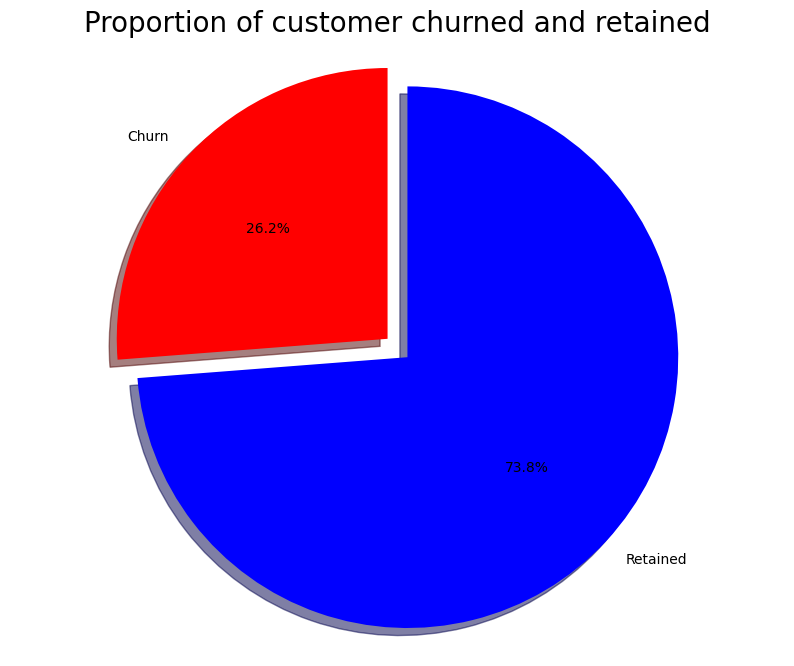

In [ ]:
labels = 'Churn', 'Retained'
sizes = [df.Churn[df['Churn']==1].count(), df.Churn[df['Churn']==0].count()]
colors = ['red', 'blue']
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size=20)
plt.show()

#Burada müşterilerin yüzdelik olarak churn olup-olmama durumuna bakıyoruz.

In [ ]:
df["Product Name"] = df["Product Name"].str.replace('com.madduck.callrecorder.', '')
#"Product Name"sütunundaki her satırdaki metinde "com.madduck.callrecorder." ifadesini kaldırıp sütun değerlerini sadeleştirdim.

In [ ]:
Product_Name_distribution = df["Product Name"].value_counts(normalize=True) * 100
print("\nApp' deki ürün isimlerinin Yüzdelik Dağılımı:")
print(Product_Name_distribution)


App' deki ürün isimlerinin Yüzdelik Dağılımı:
trialweek                          20.983607
yearlyv4                           19.344262
weekly                             16.065574
month                              11.475410
trialyearv2                         6.885246
trialweekv2                         6.885246
trialmonth20                        4.918033
threemonthnointroductorynotrial     3.606557
week                                3.606557
monthnointroductorynotrial          2.295082
trialyear                           1.639344
yearlyv5                            1.311475
sixmonthnointroductorynotrial       0.655738
monthv3                             0.327869
Name: Product Name, dtype: float64


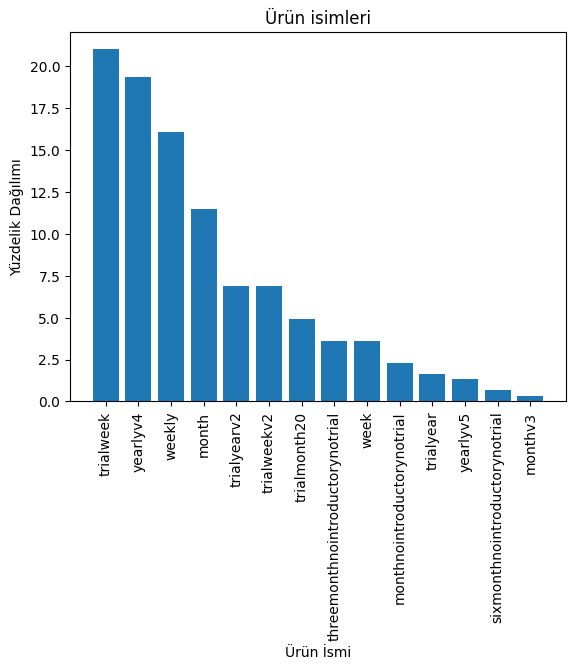

In [ ]:
plt.bar(Product_Name_distribution.index, Product_Name_distribution.values)
plt.xlabel('Ürün İsmi')
plt.ylabel('Yüzdelik Dağılımı')
plt.title('Ürün isimleri')
plt.xticks(rotation=90)
plt.show()

In [ ]:
Standard_Subscription_Duration = df["Standard Subscription Duration"].value_counts(normalize=True) * 100
print("\nMüşterilerin Standart Abonelik Süreleri:")
print(Standard_Subscription_Duration)


Müşterilerin Standart Abonelik Süreleri:
7 Days      47.540984
1 Year      29.180328
1 Month     19.016393
3 Months     3.606557
6 Months     0.655738
Name: Standard Subscription Duration, dtype: float64


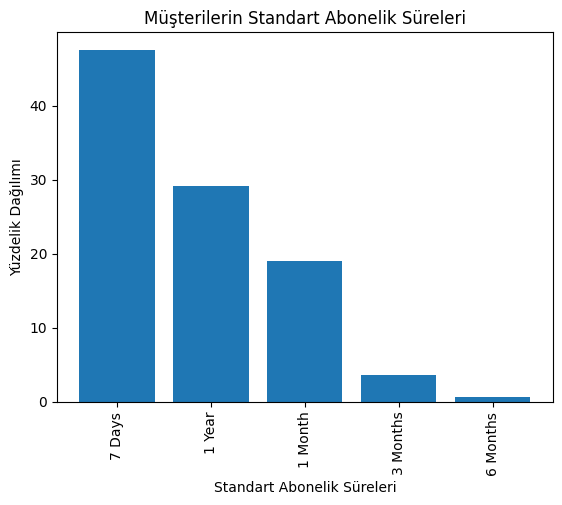

In [ ]:
plt.bar(Standard_Subscription_Duration.index, Standard_Subscription_Duration.values)
plt.xlabel('Standart Abonelik Süreleri')
plt.ylabel('Yüzdelik Dağılımı')
plt.title('Müşterilerin Standart Abonelik Süreleri')
plt.xticks(rotation=90)
plt.show()

In [ ]:
Intro_Type = df["Intro Type"].value_counts(normalize=True) * 100
print("\n Müşterilerin App Giriş Türleri:")
print(Intro_Type)


 Müşterilerin App Giriş Türleri:
T    68.196721
S    29.508197
I     2.295082
Name: Intro Type, dtype: float64


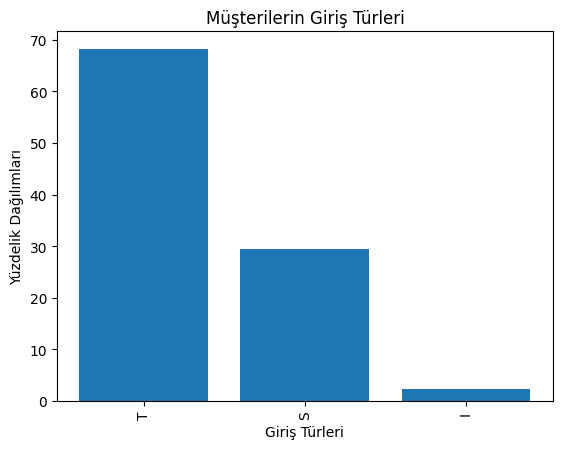

In [ ]:
plt.bar(Intro_Type.index, Intro_Type.values)
plt.xlabel('Giriş Türleri')
plt.ylabel('Yüzdelik Dağılımları')
plt.title('Müşterilerin Giriş Türleri')
plt.xticks(rotation=90)
plt.show()

In [ ]:

Subscription_Offer_Duration = df["Subscription Offer Duration"].value_counts(normalize=True) * 100
print("\nMüşterilere Sunulan Abonelik Teklif Süreleri:")
print(Subscription_Offer_Duration)


Müşterilere Sunulan Abonelik Teklif Süreleri:
3 Days          68.196721
Non Duration    29.508197
1 Month          2.295082
Name: Subscription Offer Duration, dtype: float64


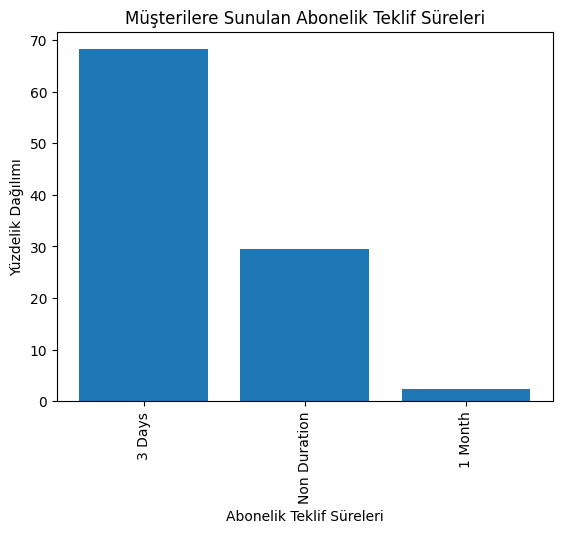

In [ ]:
plt.bar(Subscription_Offer_Duration.index, Subscription_Offer_Duration.values)
plt.xlabel('Abonelik Teklif Süreleri')
plt.ylabel('Yüzdelik Dağılımı')
plt.title('Müşterilere Sunulan Abonelik Teklif Süreleri')
plt.xticks(rotation=90)
plt.show()

In [ ]:
Subscription_Offer_Type = df["Subscription Offer Type"].value_counts(normalize=True) * 100
print("\nMüşterilere Sunulan Abonelik Teklifi Türleri:")
print(Subscription_Offer_Type)


Müşterilere Sunulan Abonelik Teklifi Türleri:
Free Trial      68.196721
Non Offer       29.508197
Pay up front     2.295082
Name: Subscription Offer Type, dtype: float64


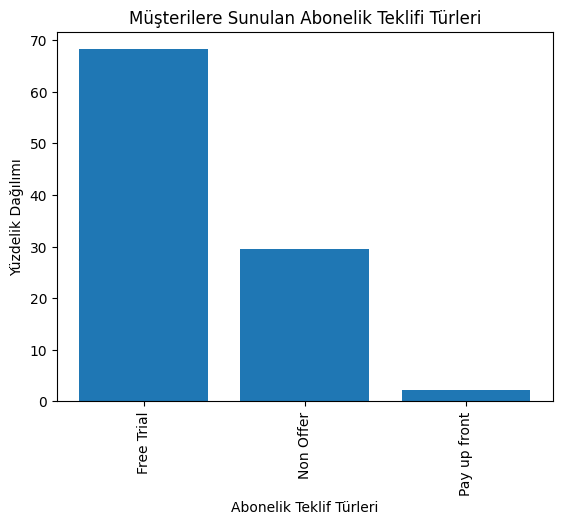

In [ ]:
Subscription_Offer_Type = df["Subscription Offer Type"].value_counts(normalize=True) * 100
plt.bar(Subscription_Offer_Type.index, Subscription_Offer_Type.values)
plt.xlabel('Abonelik Teklif Türleri')
plt.ylabel('Yüzdelik Dağılımı')
plt.title('Müşterilere Sunulan Abonelik Teklifi Türleri')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Müşterinin Kıtasal Yüzdelik Dağılımı
continent_distribution = df["continent"].value_counts(normalize=True) * 100
print("\nKıtalara Göre Dağılım:")
print(continent_distribution)


Kıtalara Göre Dağılım:
North America    38.032787
Asia             35.737705
Europe           18.032787
Oceania           3.934426
South America     3.278689
Africa            0.983607
Name: continent, dtype: float64


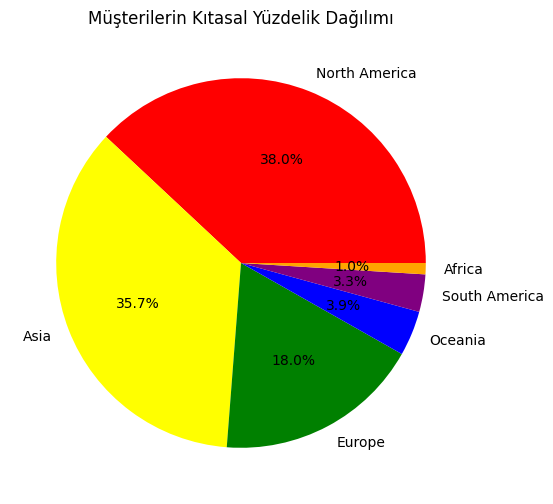

In [ ]:
# Müşterinin Kıtasal Yüzdelik Dağılımı Görseli
plt.figure(figsize=(8, 6))
colors = ['red', 'yellow', 'green', 'blue', 'purple','orange']
plt.pie(continent_distribution, labels=continent_distribution.index, autopct='%1.1f%%',colors=colors)
plt.title('Müşterilerin Kıtasal Yüzdelik Dağılımı')
plt.show()

In [ ]:
# Müşterinin Ülkesel Yüzdelik Dağılımı
region_distribution = df["region"].value_counts(normalize=True) * 100
print("\nÜlkelere Göre Dağılım:")
print(region_distribution)


Ülkelere Göre Dağılım:
US    32.131148
IL    15.409836
JP    11.147541
TR     6.229508
CA     5.573770
ES     3.606557
AU     3.278689
GB     3.278689
CH     1.967213
DK     1.639344
FR     1.639344
BR     1.639344
IN     1.639344
AT     1.311475
SE     1.311475
NO     0.983607
PT     0.655738
PE     0.655738
EG     0.655738
CL     0.655738
NZ     0.655738
PK     0.655738
EC     0.327869
QA     0.327869
AE     0.327869
FI     0.327869
DE     0.327869
NL     0.327869
IT     0.327869
RO     0.327869
MX     0.327869
ZA     0.327869
Name: region, dtype: float64


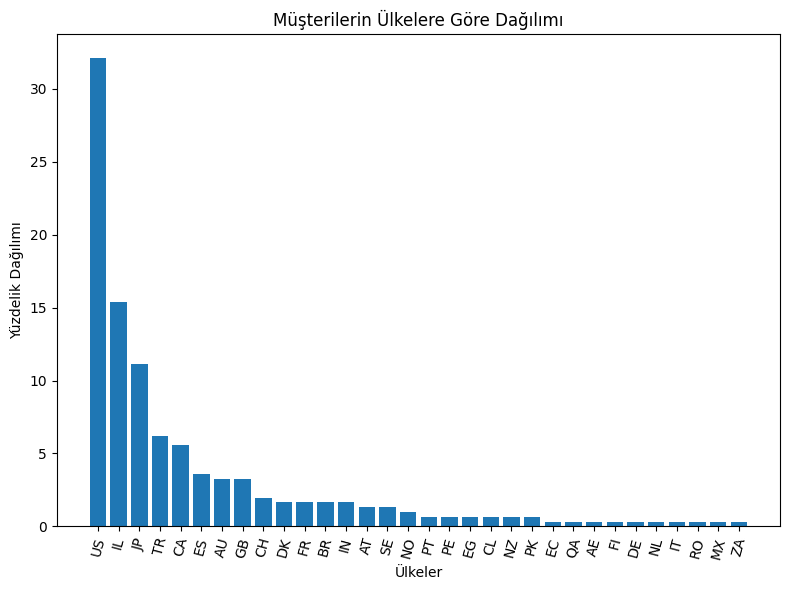

In [ ]:
# Müşterinin Ülkesel Yüzdelik Dağılımı Görseli
plt.figure(figsize=(8, 6))
plt.bar(region_distribution.index, region_distribution.values)
plt.xlabel('Ülkeler')
plt.ylabel('Yüzdelik Dağılımı')
plt.title('Müşterilerin Ülkelere Göre Dağılımı')
plt.xticks(rotation=75)
plt.xticks(size=(10))
plt.tight_layout()
plt.show()

In [ ]:
# App Kullanım Diline Göre Yüzdelik Dağılım
language_distribution = df["language"].value_counts(normalize=True) * 100
print("\nApp Kullanım Diline Göre Dağılım:")
print(language_distribution)


App Kullanım Diline Göre Dağılım:
en    55.081967
ja    10.819672
he    10.163934
tr     6.229508
es     4.918033
fr     3.606557
de     2.950820
pt     2.295082
ar     1.311475
da     0.983607
nb     0.983607
it     0.655738
Name: language, dtype: float64


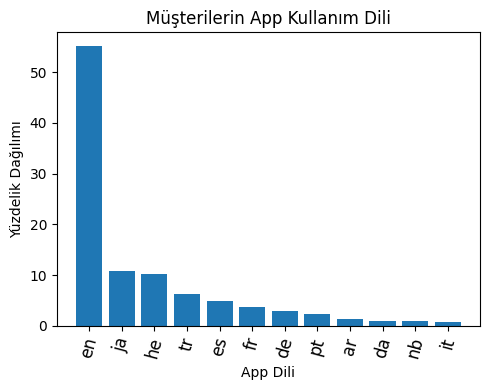

In [ ]:
plt.figure(figsize=(5, 4))
plt.bar(language_distribution.index, language_distribution.values)
plt.xlabel('App Dili')
plt.ylabel('Yüzdelik Dağılımı')
plt.title('Müşterilerin App Kullanım Dili')
plt.xticks(rotation=75)
plt.xticks(size=(12))
plt.tight_layout()
plt.show()

In [ ]:
# Appin kullanıldığı Iphone Modelinin Yüzdelik Dağılımı
device_model_distribution = df["device.model"].value_counts(normalize=True) * 100
print("\nAppin kullanıldığı Iphone Modelinin Yüzdelik Dağılımı:")
print(device_model_distribution)


Appin kullanıldığı Iphone Modelinin Yüzdelik Dağılımı:
iPhone 12 Pro Max             14.754098
iPhone 11                     13.114754
iPhone 13 Pro Max             10.819672
iPhone 13 Pro                  7.213115
iPhone 12                      7.213115
iPhone 12 Pro                  5.901639
iPhone 11 Pro Max              5.245902
iPhone 13                      4.918033
iPhone 11 Pro                  3.934426
iPhone 8                       3.606557
iPhone SE (2nd generation)     3.278689
iPhone XR                      3.278689
iPhone XS Max                  2.622951
iPhone XS                      2.295082
iPhone X                       1.967213
iPhone 12 mini                 1.639344
iPhone 7 Plus                  1.311475
iPhone15,2                     1.311475
iPhone 7                       1.311475
iPhone14,7                     0.983607
iPhone 13 mini                 0.983607
iPhone 8 Plus                  0.655738
iPhone 6s                      0.655738
iPhone 6                

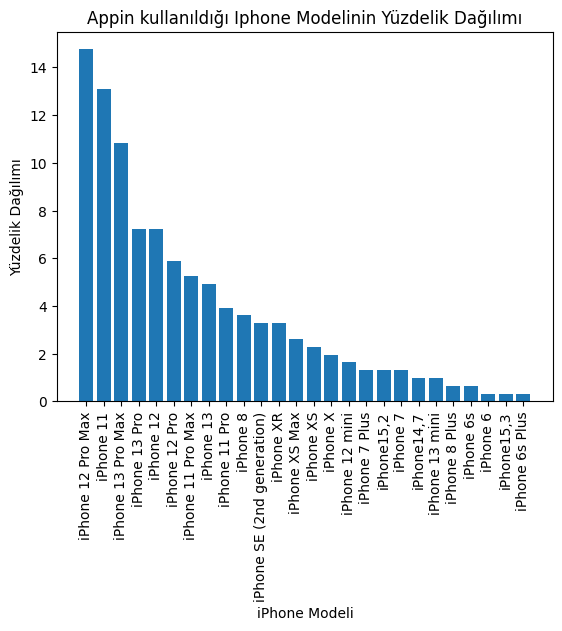

In [ ]:
plt.bar(device_model_distribution.index, device_model_distribution.values)
plt.xlabel('iPhone Modeli')
plt.ylabel('Yüzdelik Dağılımı')
plt.title('Appin kullanıldığı Iphone Modelinin Yüzdelik Dağılımı')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Appin kullanıldığı Iphone Modelinin İOS Versiyonu Yüzdelik Dağılımı
device_IOS_version_distribution = df["device.iOSVersion"].value_counts(normalize=True) * 100
print("\nAppin kullanıldığı Iphone Modelinin İOS Versiyonu Yüzdelik Dağılımı:")
print(device_IOS_version_distribution)


Appin kullanıldığı Iphone Modelinin İOS Versiyonu Yüzdelik Dağılımı:
15.6.1    40.983607
16.1.1    12.131148
15.6       8.524590
16.0       7.868852
15.5       6.229508
16.0.3     4.262295
16.1.2     4.262295
15.7       3.278689
16.0.2     1.967213
16.1       1.639344
14.7.1     1.311475
15.3.1     1.311475
16.2       0.983607
15.7.1     0.983607
15.2.1     0.655738
14.8.1     0.655738
14.6       0.327869
15.4       0.327869
14.2       0.327869
15.4.1     0.327869
16.0.1     0.327869
12.5.5     0.327869
14.8       0.327869
15.0.2     0.327869
14.4.2     0.327869
Name: device.iOSVersion, dtype: float64


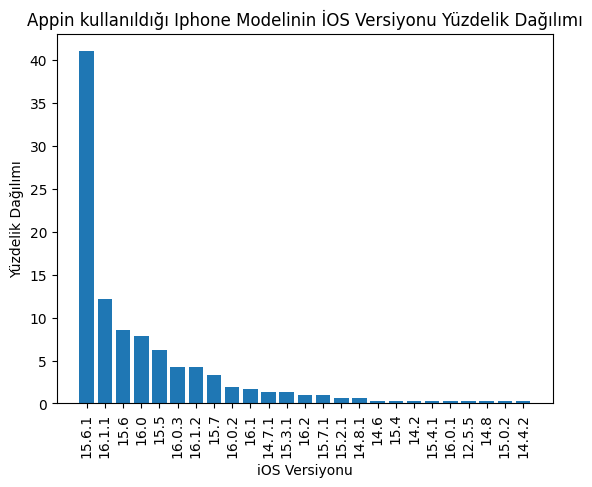

In [ ]:
plt.bar(device_IOS_version_distribution.index, device_IOS_version_distribution.values)
plt.xlabel('iOS Versiyonu')
plt.ylabel('Yüzdelik Dağılımı')
plt.title('Appin kullanıldığı Iphone Modelinin İOS Versiyonu Yüzdelik Dağılımı')
plt.xticks(rotation=90)
plt.show()

In [ ]:
app_Version = df["appVersion"].value_counts(normalize=True) * 100
print("\n Müşteri Telefonlarının App Versiyonu:")
print(app_Version)


 Müşteri Telefonlarının App Versiyonu:
8.1      20.327869
8.2      20.327869
8.0.1    18.032787
8.0.2    17.704918
7.3.8    10.491803
7.3.6     5.245902
7.3.2     3.934426
7.3.7     1.967213
7.3.4     0.983607
8.0.0     0.655738
0.0.0     0.327869
Name: appVersion, dtype: float64


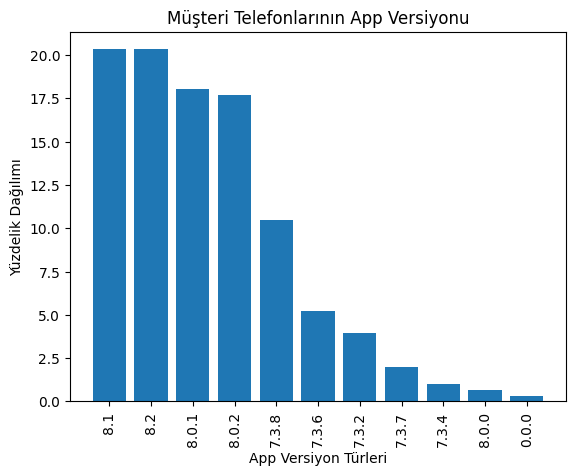

In [ ]:
app_Version  = df["appVersion"].value_counts(normalize=True) * 100
plt.bar(app_Version.index, app_Version.values)
plt.xlabel('App Versiyon Türleri')
plt.ylabel('Yüzdelik Dağılımı')
plt.title('Müşteri Telefonlarının App Versiyonu')
plt.xticks(rotation=90)
plt.show()

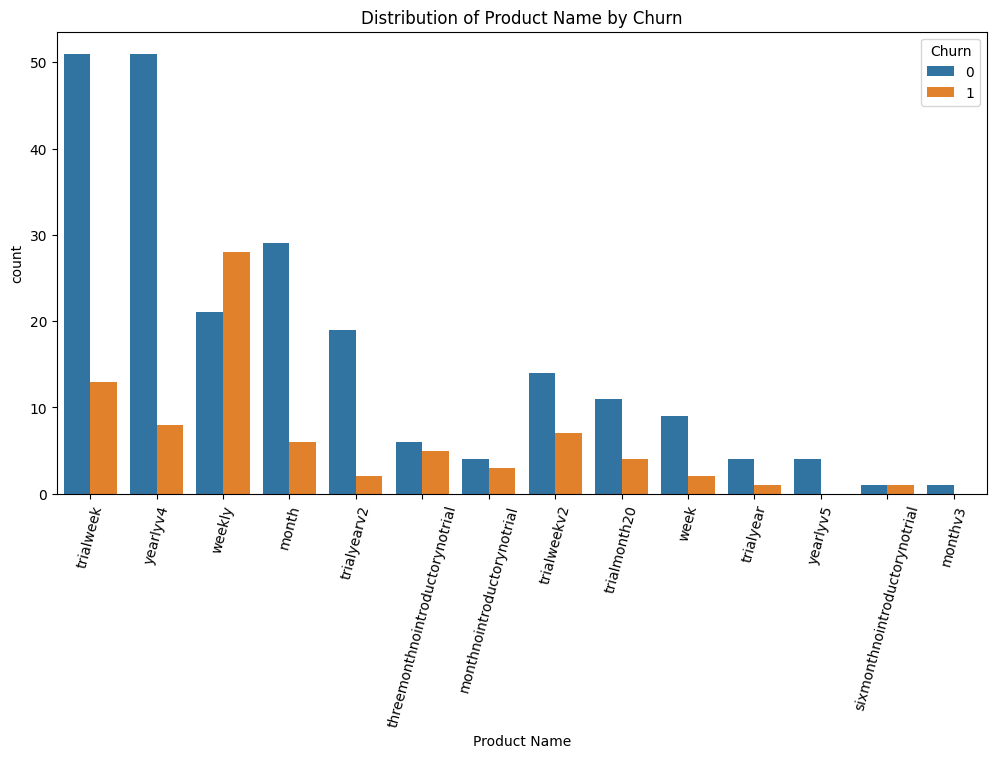

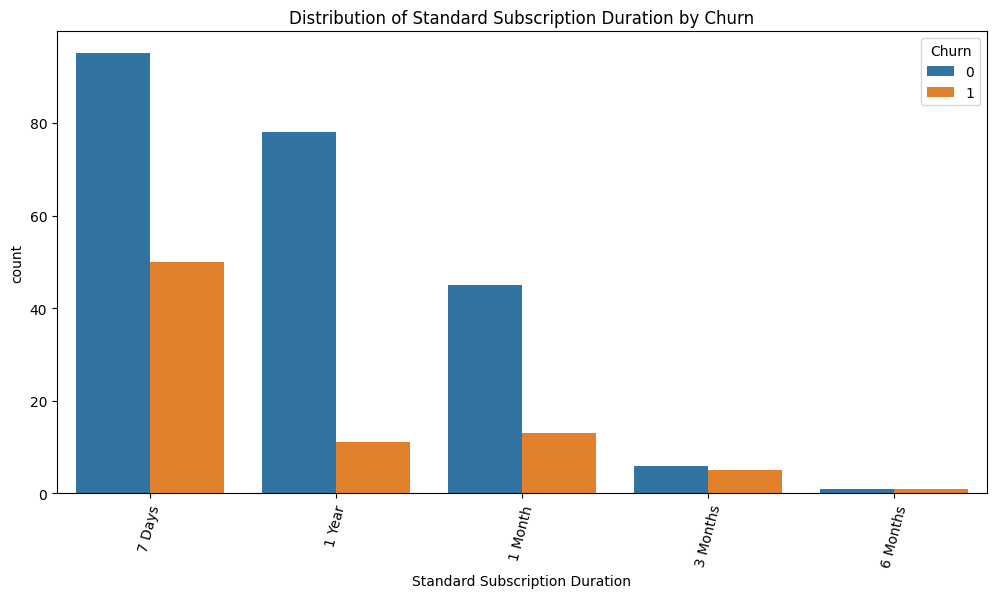

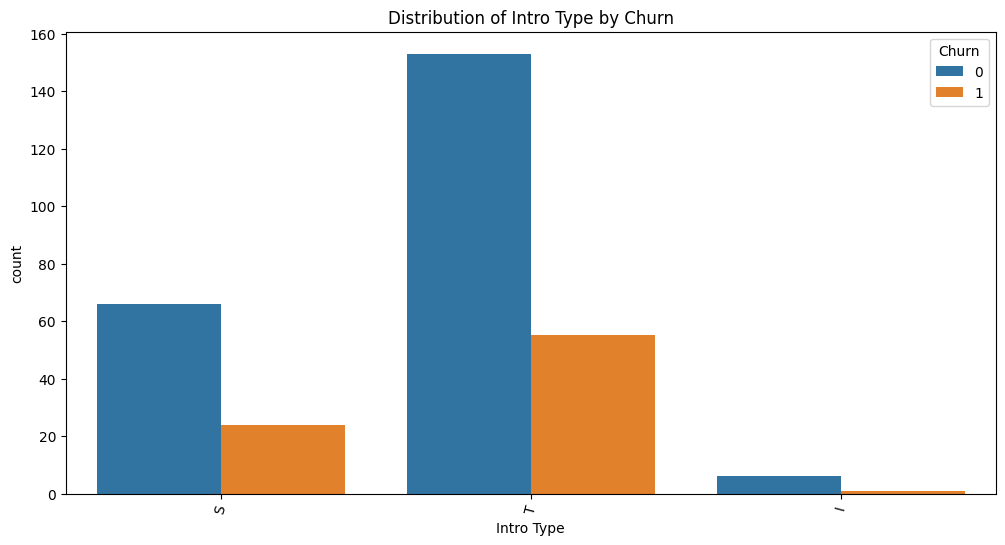

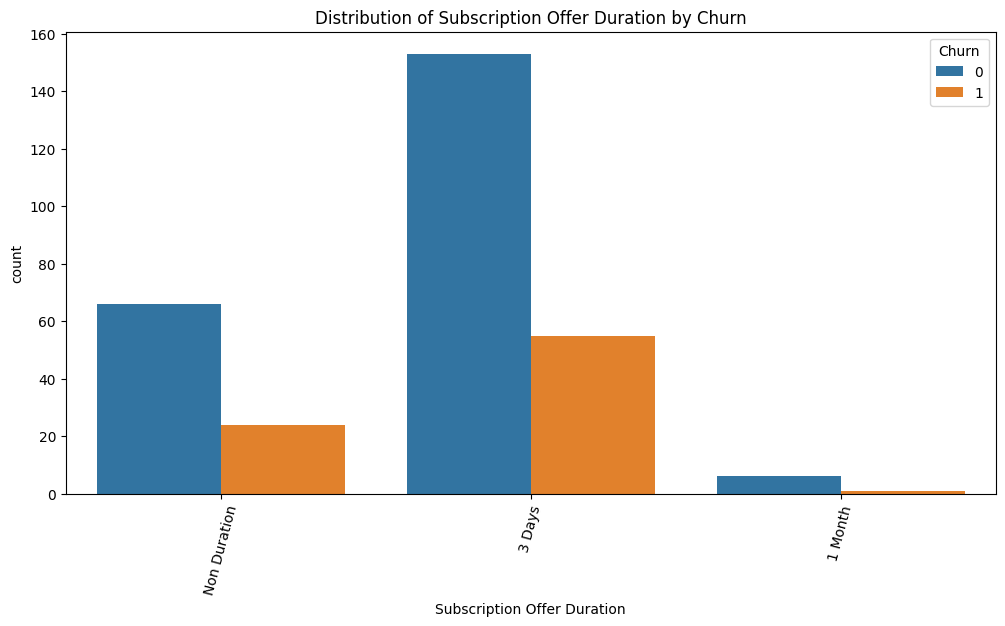

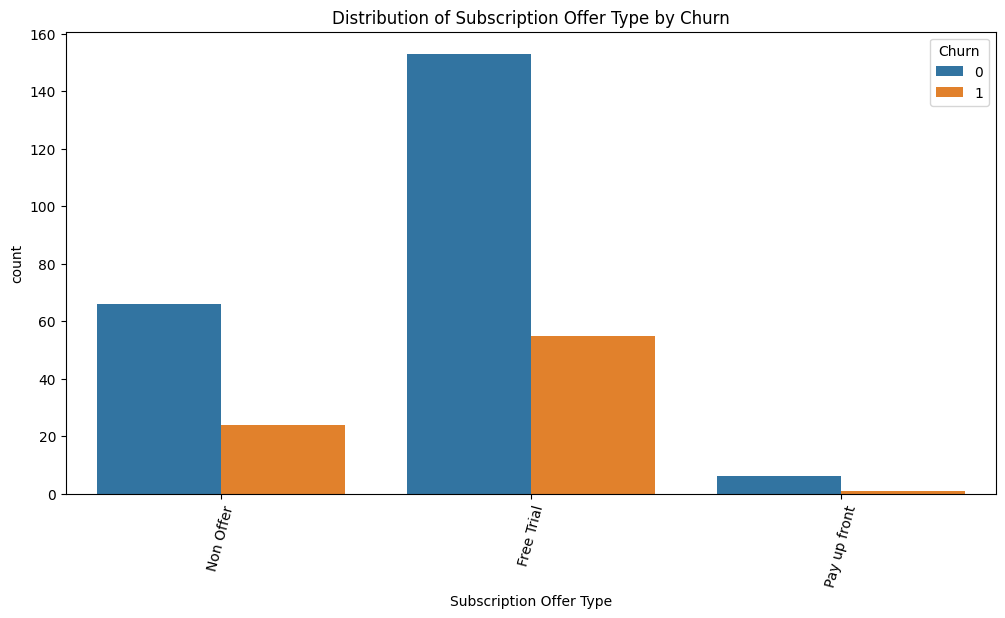

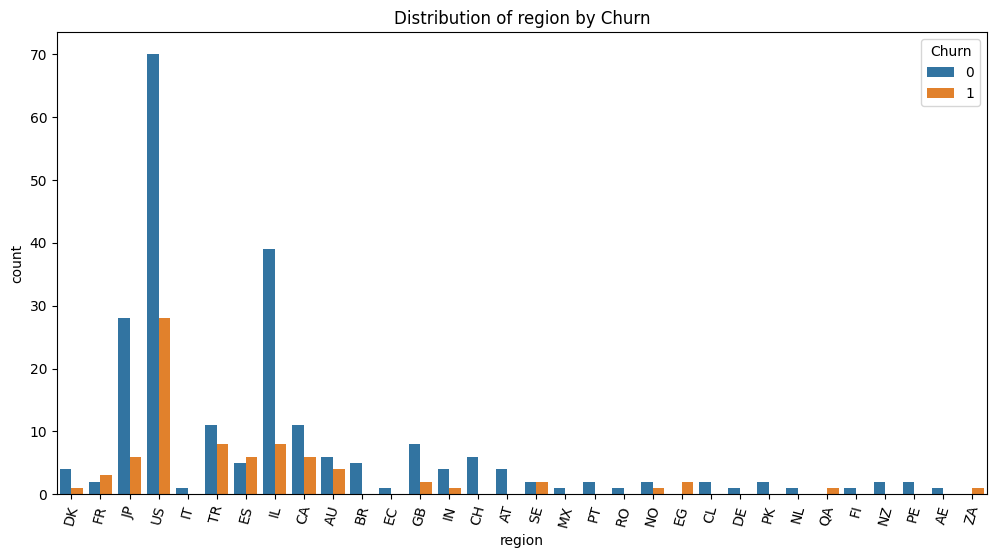

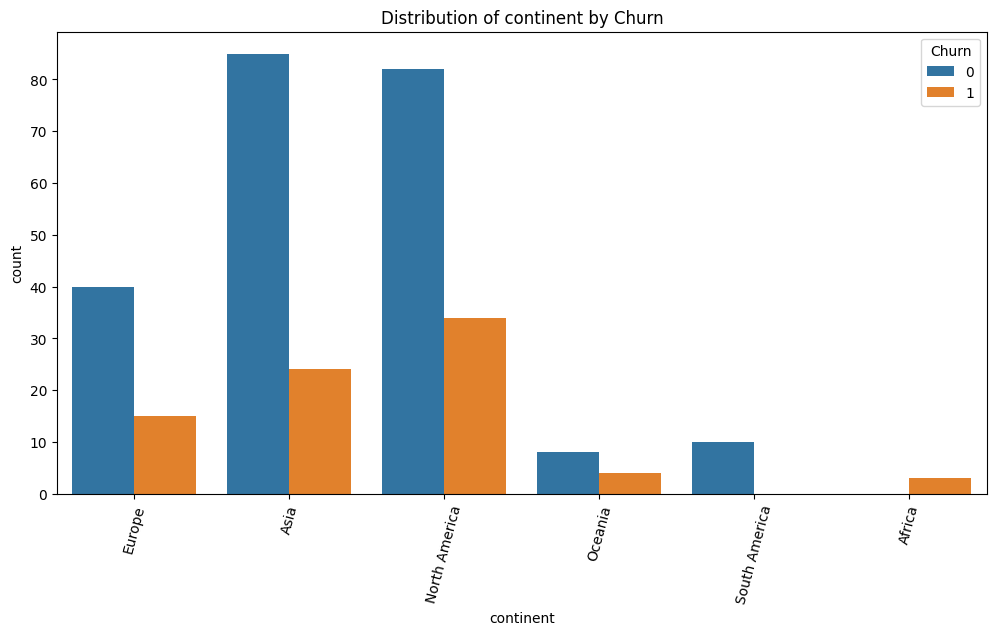

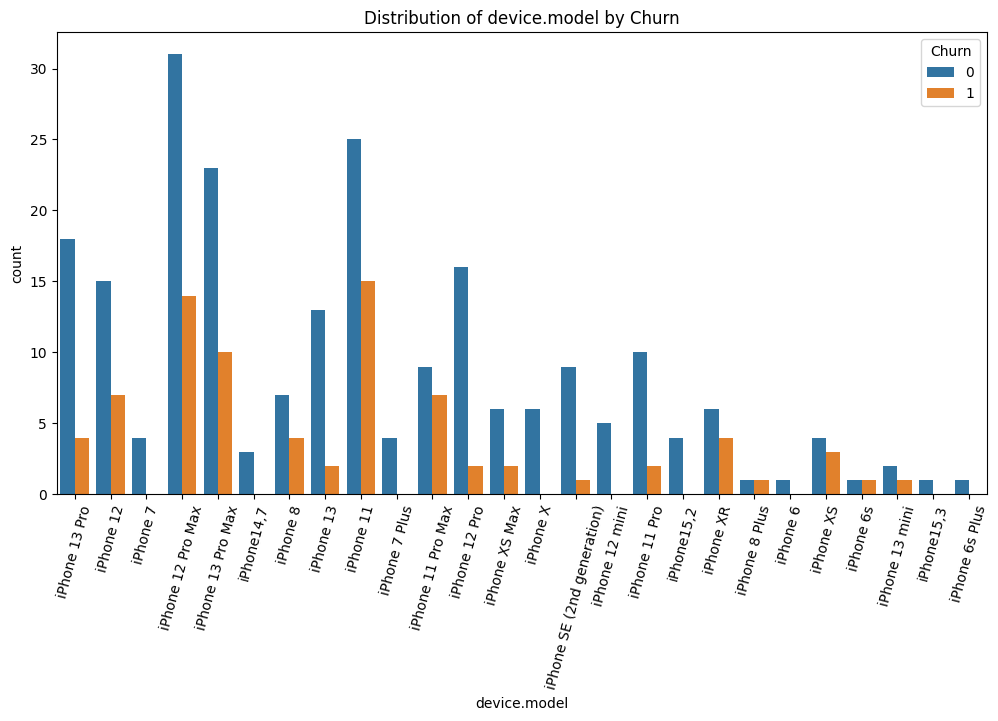

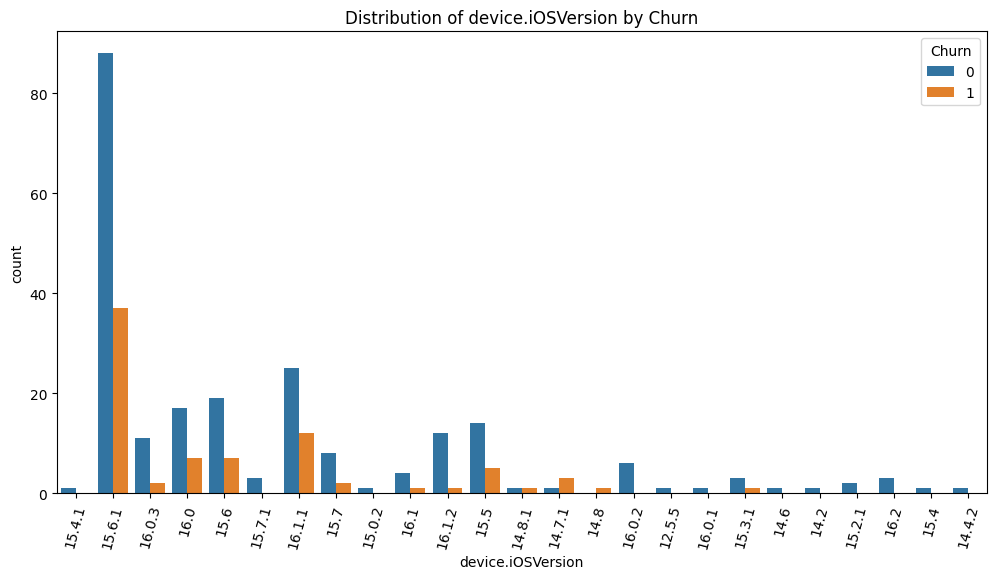

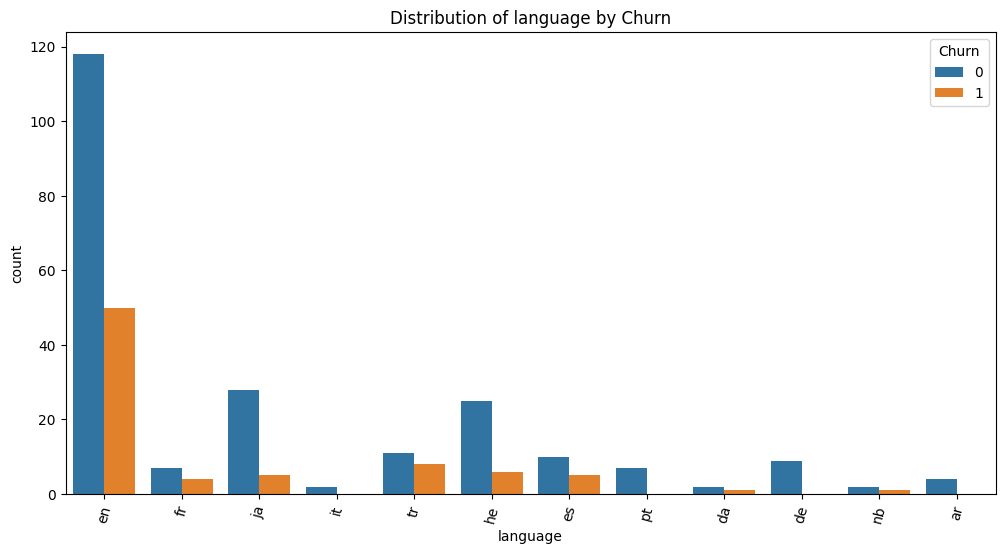

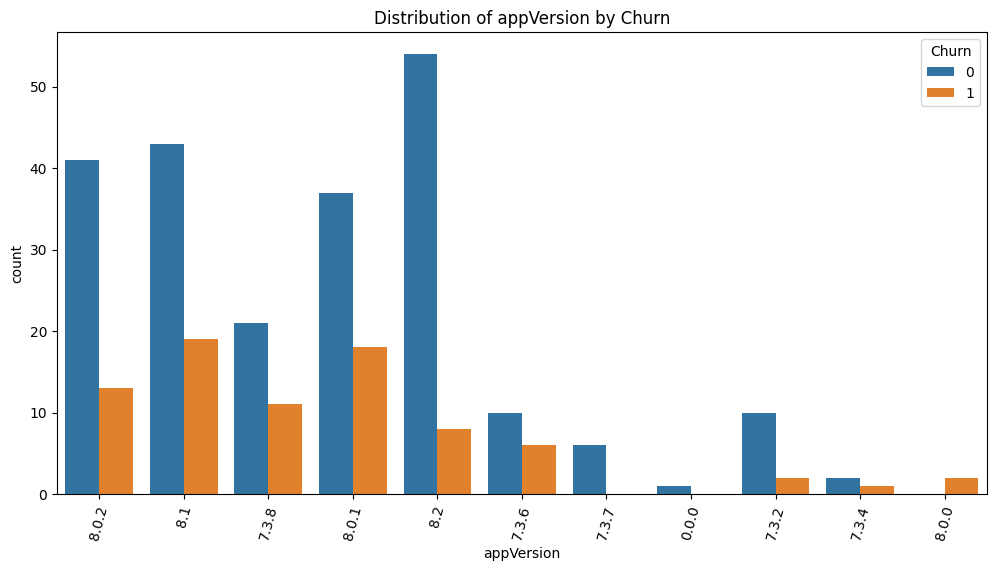

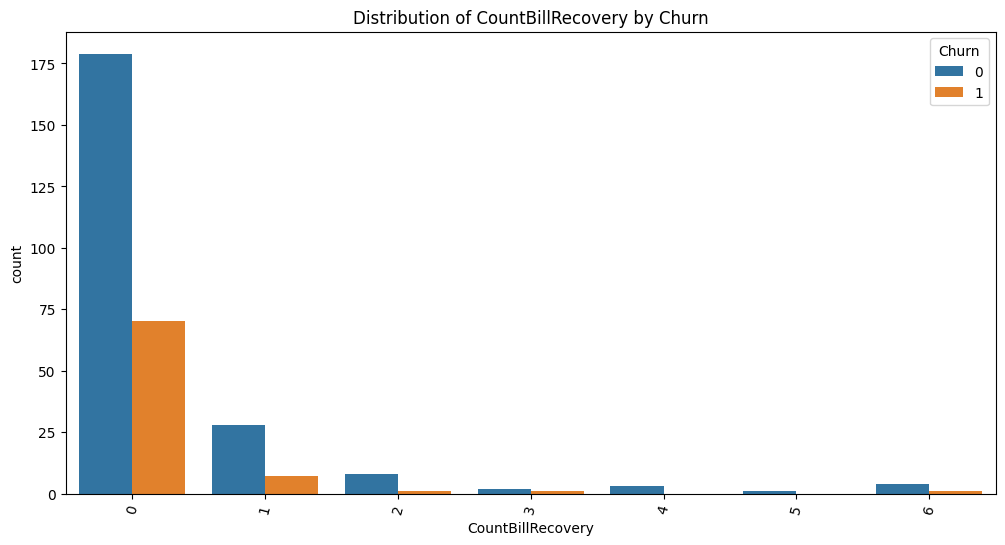

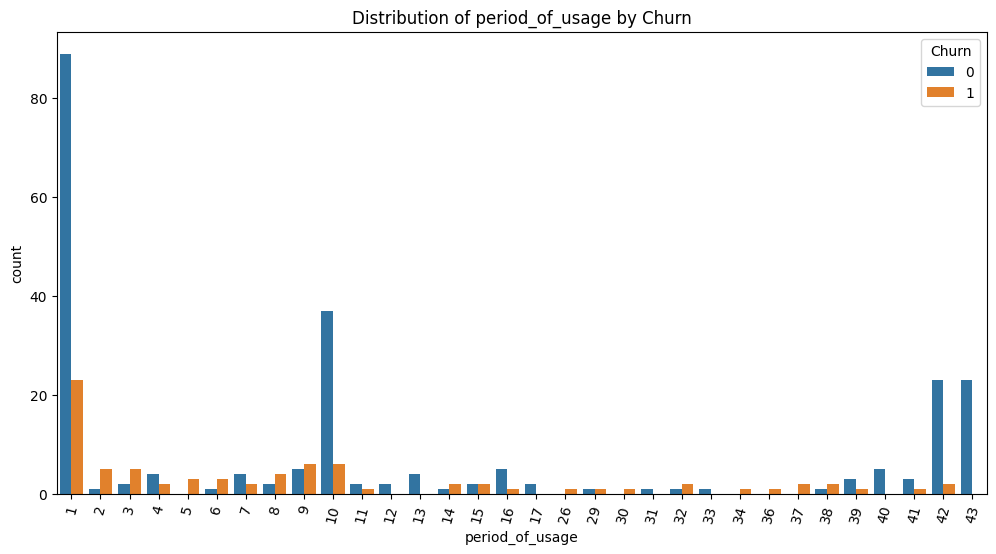

In [ ]:
#Datasetteki farklı sütunların churn durumlarına göre dağılımını inceledim.
columns_to_plot = [
    'Product Name', 'Standard Subscription Duration', 'Intro Type',
    'Subscription Offer Duration', 'Subscription Offer Type', 'region',
    'continent', 'device.model', 'device.iOSVersion', 'language',
    'appVersion', 'CountBillRecovery', 'period_of_usage']

for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, hue='Churn', data=df)
    plt.title(f'Distribution of {column} by Churn')
    plt.xticks(rotation=75, fontsize=10)
    plt.show()

In [ ]:
#İOS VERSİON-APP VERSİON arasındaki ilişki dikkatimi çekti ve bu ilişkiyi analiz etmek istedim.
subset = df[['device.iOSVersion', 'appVersion', 'Churn']]

cross_tab = pd.crosstab(index=[subset['device.iOSVersion'], subset['Churn']],
                        columns=subset['appVersion'],
                        normalize='index')

print(cross_tab)

appVersion                  0.0.0     7.3.2     7.3.4     7.3.6     7.3.7  \
device.iOSVersion Churn                                                     
12.5.5            0      0.000000  0.000000  0.000000  0.000000  0.000000   
14.2              0      0.000000  0.000000  0.000000  0.000000  0.000000   
14.4.2            0      0.000000  0.000000  0.000000  0.000000  0.000000   
14.6              0      0.000000  0.000000  0.000000  0.000000  0.000000   
14.7.1            0      0.000000  0.000000  0.000000  0.000000  0.000000   
                  1      0.000000  0.333333  0.000000  0.000000  0.000000   
14.8              1      0.000000  0.000000  0.000000  0.000000  0.000000   
14.8.1            0      0.000000  0.000000  0.000000  0.000000  0.000000   
                  1      0.000000  1.000000  0.000000  0.000000  0.000000   
15.0.2            0      0.000000  0.000000  0.000000  0.000000  0.000000   
15.2.1            0      0.000000  0.000000  0.000000  0.000000  0.000000   

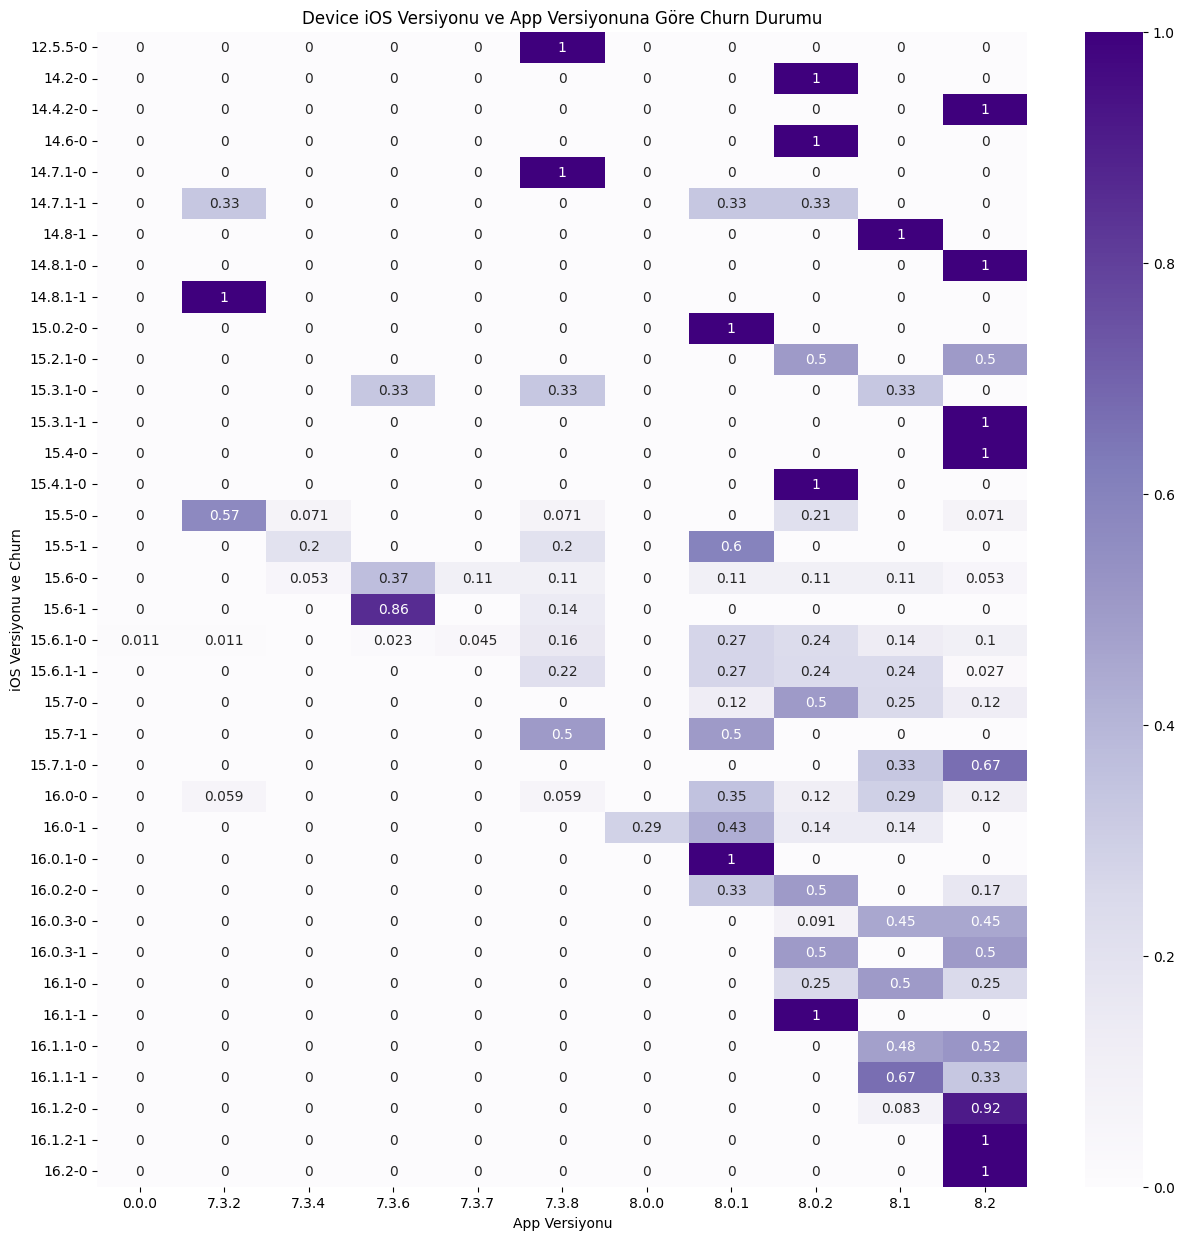

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(cross_tab, cmap="Purples", annot=True)
plt.title('Device iOS Versiyonu ve App Versiyonuna Göre Churn Durumu')
plt.ylabel('iOS Versiyonu ve Churn')
plt.xlabel('App Versiyonu')
plt.show()

In [ ]:
#Churn olan müşterilerin device.iOSVersion ve appVersionlarına göre sayılarına baktım.

# Churn değeri 1 olan satırları filtreledim.
churned_subset = df[df['Churn'] == 1]

# Her bir "device.iOSVersion" ve "appVersion" ikilisi için kaç kere churn olduğunu hesapladım.
churned_pairs = churned_subset.groupby(['device.iOSVersion', 'appVersion']).size().reset_index(name='count')

print(churned_pairs)

   device.iOSVersion appVersion  count
0             14.7.1      7.3.2      1
1             14.7.1      8.0.1      1
2             14.7.1      8.0.2      1
3               14.8        8.1      1
4             14.8.1      7.3.2      1
5             15.3.1        8.2      1
6               15.5      7.3.4      1
7               15.5      7.3.8      1
8               15.5      8.0.1      3
9               15.6      7.3.6      6
10              15.6      7.3.8      1
11            15.6.1      7.3.8      8
12            15.6.1      8.0.1     10
13            15.6.1      8.0.2      9
14            15.6.1        8.1      9
15            15.6.1        8.2      1
16              15.7      7.3.8      1
17              15.7      8.0.1      1
18              16.0      8.0.0      2
19              16.0      8.0.1      3
20              16.0      8.0.2      1
21              16.0        8.1      1
22            16.0.3      8.0.2      1
23            16.0.3        8.2      1
24              16.1     

In [ ]:
# "Churn Date" sütununda "nat" olmayan değerleri bir listeye aldım.
non_nat_dates = df['Churn Date'].dropna().tolist()
# Tarih sırasına göre sıraladım.
sorted_dates = sorted(non_nat_dates)

print("\nSıralanmış Tarihler:")
for date in sorted_dates:
    print(date)


Sıralanmış Tarihler:
2022-08-11 00:00:00
2022-08-14 00:00:00
2022-08-19 00:00:00
2022-08-21 00:00:00
2022-08-25 00:00:00
2022-08-25 00:00:00
2022-08-27 00:00:00
2022-08-27 00:00:00
2022-08-29 00:00:00
2022-08-31 00:00:00
2022-09-01 00:00:00
2022-09-05 00:00:00
2022-09-06 00:00:00
2022-09-11 00:00:00
2022-09-12 00:00:00
2022-09-14 00:00:00
2022-09-15 00:00:00
2022-09-15 00:00:00
2022-09-16 00:00:00
2022-09-16 00:00:00
2022-09-18 00:00:00
2022-09-19 00:00:00
2022-09-20 00:00:00
2022-09-20 00:00:00
2022-09-22 00:00:00
2022-09-24 00:00:00
2022-09-26 00:00:00
2022-09-28 00:00:00
2022-09-29 00:00:00
2022-10-02 00:00:00
2022-10-03 00:00:00
2022-10-03 00:00:00
2022-10-03 00:00:00
2022-10-03 00:00:00
2022-10-04 00:00:00
2022-10-04 00:00:00
2022-10-04 00:00:00
2022-10-08 00:00:00
2022-10-10 00:00:00
2022-10-11 00:00:00
2022-10-12 00:00:00
2022-10-15 00:00:00
2022-10-17 00:00:00
2022-10-17 00:00:00
2022-10-21 00:00:00
2022-10-22 00:00:00
2022-10-25 00:00:00
2022-10-26 00:00:00
2022-10-28 00:00:0

In [ ]:
non_nat_dates = df['Churn Date'].dropna()

month_counts = non_nat_dates.dt.month.value_counts().sort_index()

print("Her Aydan Kaç Tane Olduğu:")
for month, count in month_counts.iteritems():
    print(f"Ay {month}: {count} tane")

Her Aydan Kaç Tane Olduğu:
Ay 8: 10 tane
Ay 9: 19 tane
Ay 10: 23 tane
Ay 11: 28 tane


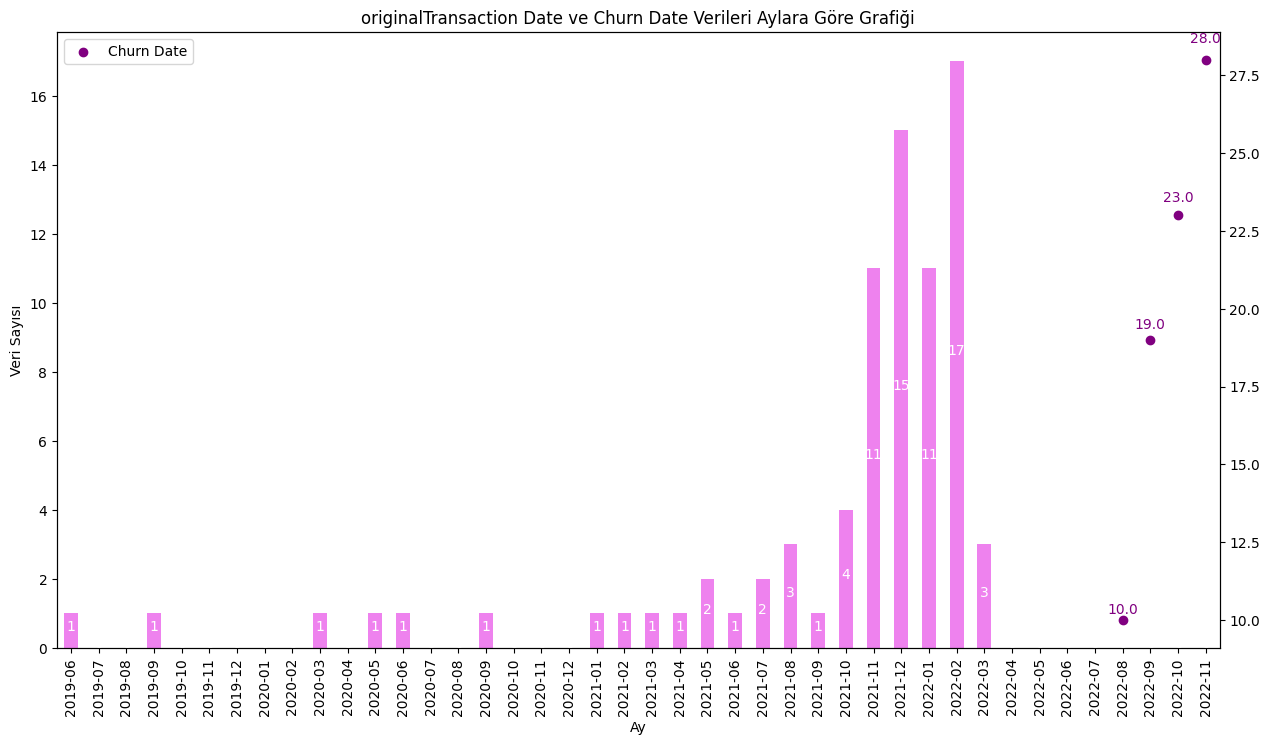

In [ ]:
data_churned = df[df['Churn'] == 1]

data_churned = data_churned[data_churned['Churn Date'].notna()]

data_churned['originalTransaction Month'] = pd.to_datetime(data_churned['originalTransaction Date']).dt.to_period('M')
data_churned['Churn Month'] = pd.to_datetime(data_churned['Churn Date']).dt.to_period('M')

original_aylar_gruplama = data_churned['originalTransaction Month'].value_counts().sort_index()
churn_aylar_gruplama = data_churned['Churn Month'].value_counts().sort_index()


all_months = pd.period_range(start=data_churned['originalTransaction Month'].min(),
                             end=max(data_churned['originalTransaction Month'].max(), data_churned['Churn Month'].max()),
                             freq='M')

original_aylar_gruplama = original_aylar_gruplama.reindex(all_months, fill_value=0)
churn_aylar_gruplama = churn_aylar_gruplama.reindex(all_months, fill_value=None)

plt.figure(figsize=(15, 8))

original_aylar_gruplama.plot(kind='bar', color='violet', label='originalTransaction Date')
plt.xlabel('Ay')
plt.ylabel('Veri Sayısı')
plt.title('originalTransaction Date ve Churn Date Verileri Aylara Göre Grafiği')

for index, value in enumerate(original_aylar_gruplama):
    plt.text(index, value/2, str(value), ha='center', color='white')

ax2 = plt.gca().twinx()
ax2.scatter(range(len(all_months)), churn_aylar_gruplama.values, color='purple', label='Churn Date')

for index, value in enumerate(churn_aylar_gruplama):
    ax2.text(index, value + 0.02 * value, str(value), ha='center', color='purple')

plt.xticks(range(len(all_months)), [str(ay) for ay in all_months], rotation=75)

plt.legend()

plt.show()

In [ ]:
#Her sütundaki unique değerlere ve bu değerlerin sayılarına baktım.
for sütun in df.columns:
    unique_değerler_sayısı = df[sütun].nunique()
    unique_değerler_sayıları = df[sütun].value_counts()
    print(f"'{sütun}' sütunundaki unique değerlerin sayısı: {unique_değerler_sayısı}")
    print(f"'{sütun}' sütunundaki her unique değerin sayısı:\n{unique_değerler_sayıları}\n")

'userId' sütunundaki unique değerlerin sayısı: 305
'userId' sütunundaki her unique değerin sayısı:
002F4A9D-4EA4-418B-A54F-B9EBDAA33384    1
A9F12255-80B7-42F8-9C52-3497BA8C72BE    1
B0F30EA7-4D0D-416F-B8E7-5CEDA665077F    1
B044273E-2CB2-42AC-8D94-4A8B0D03EAF7    1
AEFA3C2E-E9BC-4773-BF49-7FD9647E7A5E    1
                                       ..
51AFFE6E-77F8-4448-A9F0-CE69C669EF70    1
519011A8-D295-4459-8AF4-59CB8A4E5372    1
50F0C68E-F11F-489F-8300-84210539A4FC    1
50A41C19-3CCB-4AF6-A685-DC1283A8C215    1
FFD7586C-55E2-4321-AED6-AB8A6D12002B    1
Name: userId, Length: 305, dtype: int64

'Product Name' sütunundaki unique değerlerin sayısı: 14
'Product Name' sütunundaki her unique değerin sayısı:
trialweek                          64
yearlyv4                           59
weekly                             49
month                              35
trialyearv2                        21
trialweekv2                        21
trialmonth20                       15
threemonthnointroducto

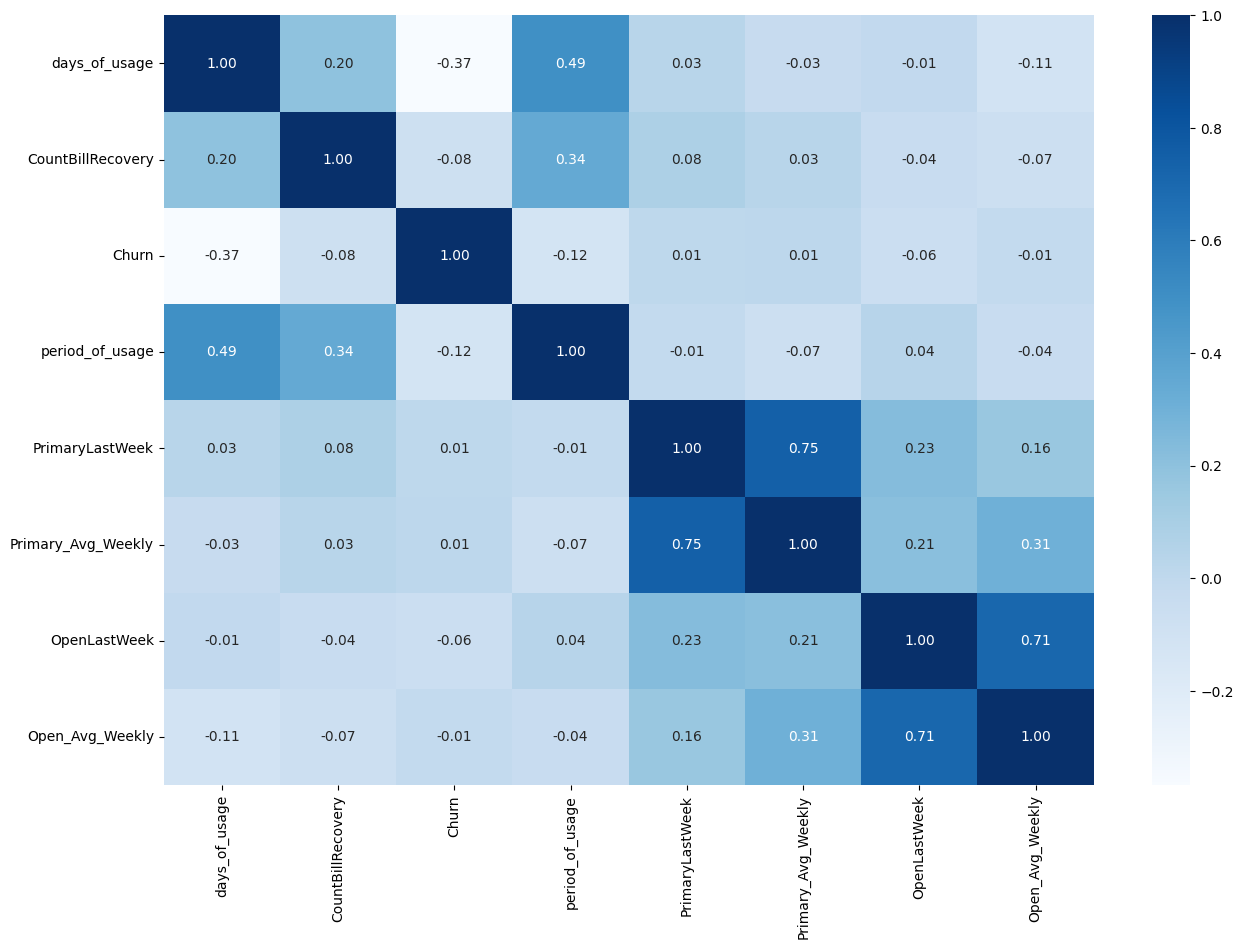

In [ ]:
#DataFrame in korelasyon matrisini hesapladım ve bu matrisi ısı haritası (heatmap) olarak görselleştirdim.
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot = True , fmt=".2f",ax=ax ,cmap = "Blues")
plt.show()
#Korelasyon katsayısı: 1'e yaklaştıkça, iki değişken arasındaki pozitif bir korelasyonun gücü artar. -1'e yaklaştıkça, negatif bir korelasyonun gücü artar. 0'a yaklaştıkça, iki değişken arasında korelasyon yok denecek kadar azdır.
#Pozitif korelasyon: Bir değişken artarken diğer değişken de artıyorsa, pozitif bir korelasyon vardır. Örneğin, iki değişken arasındaki korelasyon katsayısı 0.75 ise, bu iki değişken arasında güçlü bir pozitif ilişki olduğunu gösterir.
#Negatif korelasyon: Bir değişken artarken diğer değişken azalıyorsa, negatif bir korelasyon vardır. Örneğin, iki değişken arasındaki korelasyon katsayısı -0.60 ise, bu iki değişken arasında orta düzeyde bir negatif ilişki olduğunu gösterir.


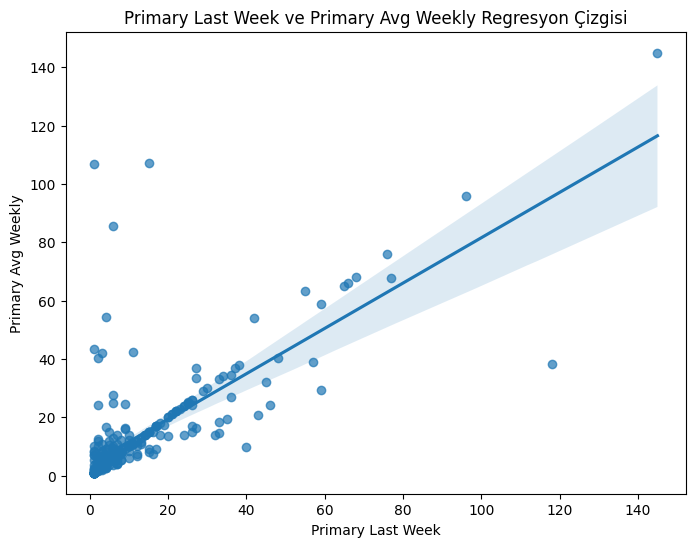

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='PrimaryLastWeek', y='Primary_Avg_Weekly', data=df, scatter_kws={'alpha':0.7})
plt.xlabel('Primary Last Week')
plt.ylabel('Primary Avg Weekly')
plt.title('Primary Last Week ve Primary Avg Weekly Regresyon Çizgisi')
plt.show()
#"PrimaryLastWeek" ile "Primary_Avg_Weekly" arasında pozitif bir doğrusal ilişki vardır. Bir kullanıcının "PrimaryLastWeek"
# değeri arttıkça, ortalama haftalık açılma sayısı ("Primary_Avg_Weekly") de artmaktadır.

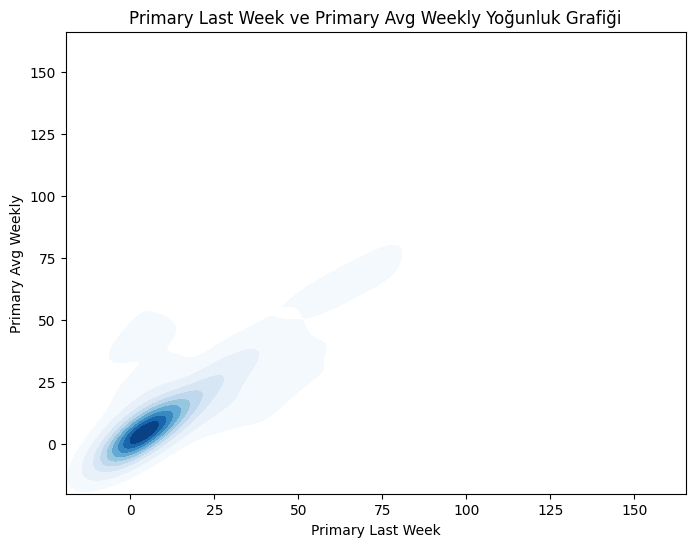

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='PrimaryLastWeek', y='Primary_Avg_Weekly', data=df, cmap='Blues', fill=True)
plt.xlabel('Primary Last Week')
plt.ylabel('Primary Avg Weekly')
plt.title('Primary Last Week ve Primary Avg Weekly Yoğunluk Grafiği')
plt.show()

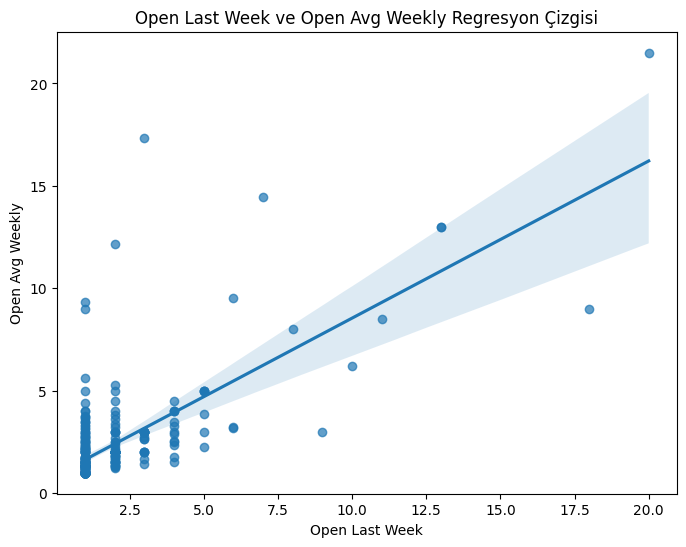

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='OpenLastWeek', y='Open_Avg_Weekly', data=df, scatter_kws={'alpha':0.7})
plt.xlabel('Open Last Week')
plt.ylabel('Open Avg Weekly')
plt.title('Open Last Week ve Open Avg Weekly Regresyon Çizgisi')
plt.show()


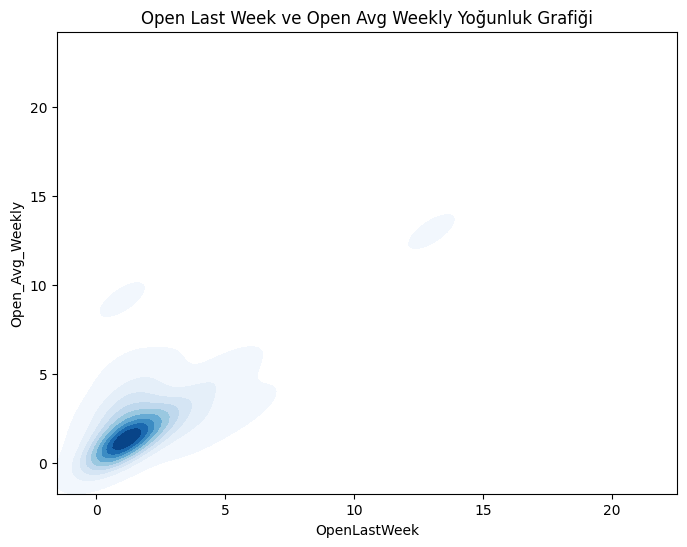

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='OpenLastWeek', y='Open_Avg_Weekly', data=df, cmap='Blues', fill=True)
plt.xlabel('OpenLastWeek')
plt.ylabel('Open_Avg_Weekly')
plt.title('Open Last Week ve Open Avg Weekly Yoğunluk Grafiği')
plt.show()

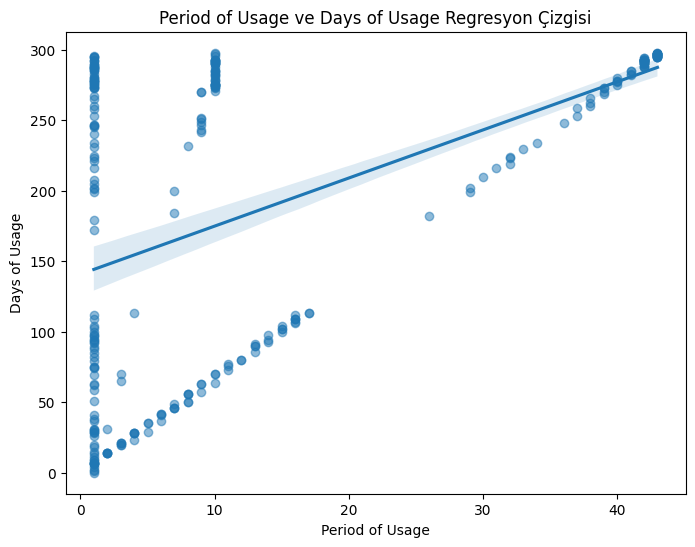

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='period_of_usage', y='days_of_usage', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Period of Usage')
plt.ylabel('Days of Usage')
plt.title('Period of Usage ve Days of Usage Regresyon Çizgisi')
plt.show()

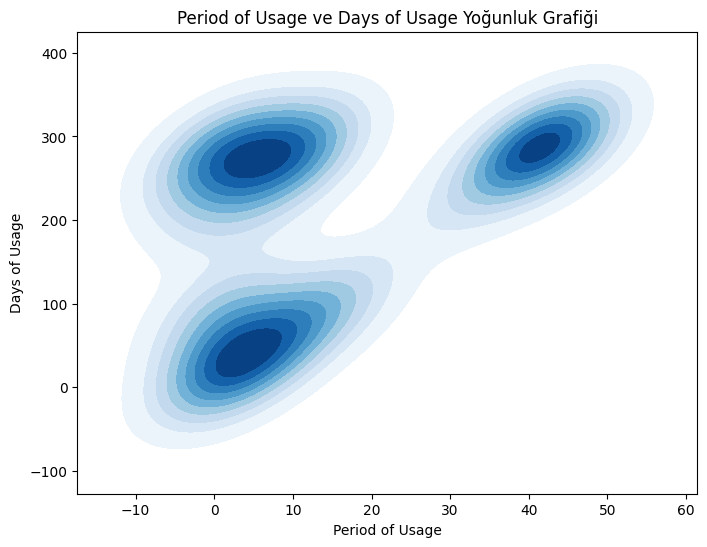

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='period_of_usage', y='days_of_usage', data=df, cmap='Blues', fill=True)
plt.xlabel('Period of Usage')
plt.ylabel('Days of Usage')
plt.title('Period of Usage ve Days of Usage Yoğunluk Grafiği')
plt.show()

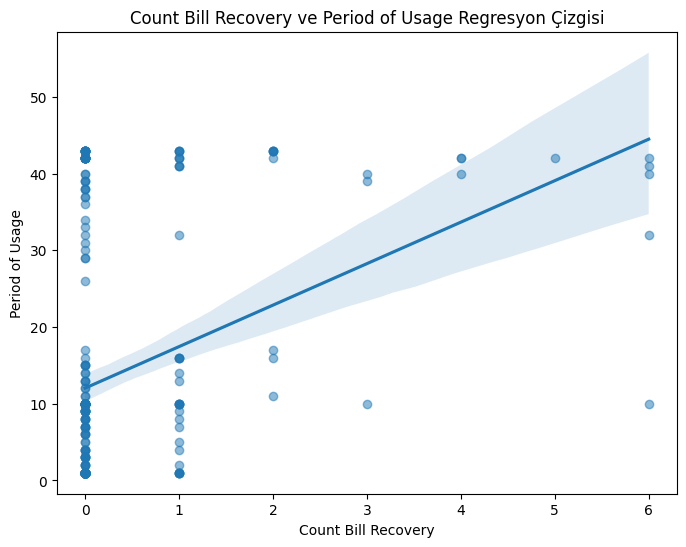

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='CountBillRecovery', y='period_of_usage', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Count Bill Recovery')
plt.ylabel('Period of Usage')
plt.title('Count Bill Recovery ve Period of Usage Regresyon Çizgisi')
plt.show()

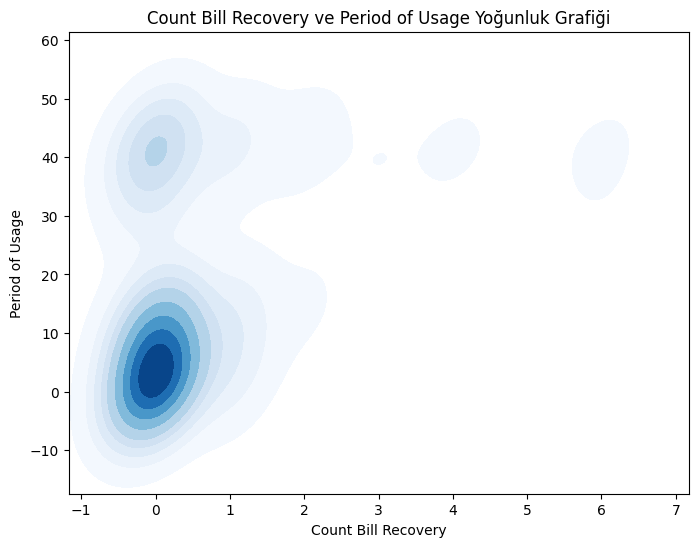

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='CountBillRecovery', y='period_of_usage', data=df, cmap='Blues', fill=True)
plt.xlabel('Count Bill Recovery')
plt.ylabel('Period of Usage')
plt.title('Count Bill Recovery ve Period of Usage Yoğunluk Grafiği')
plt.show()

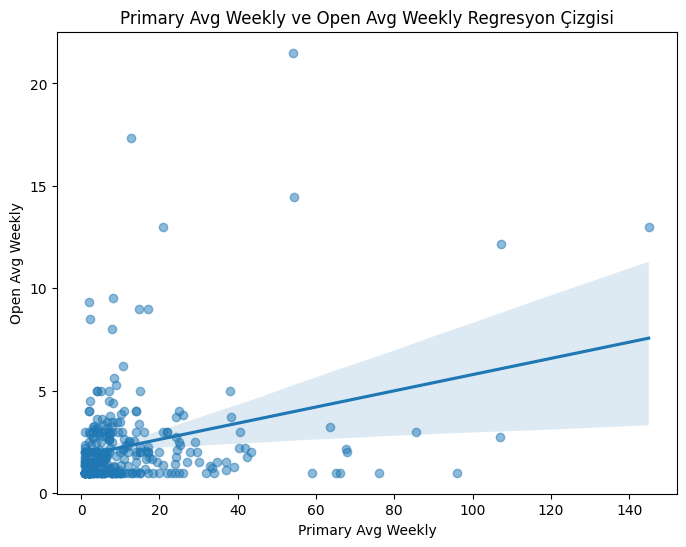

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Primary_Avg_Weekly', y='Open_Avg_Weekly', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Primary Avg Weekly')
plt.ylabel('Open Avg Weekly')
plt.title('Primary Avg Weekly ve Open Avg Weekly Regresyon Çizgisi')
plt.show()

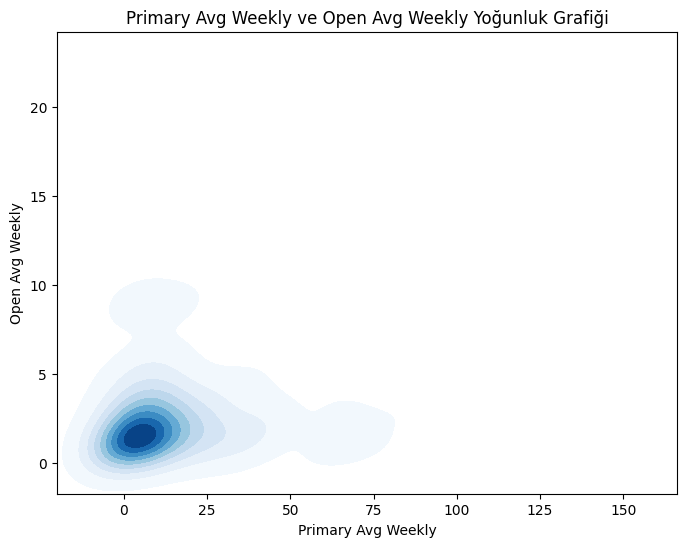

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x='Primary_Avg_Weekly', y='Open_Avg_Weekly', data=df, cmap='Blues', fill=True)
plt.xlabel('Primary Avg Weekly')
plt.ylabel('Open Avg Weekly')
plt.title('Primary Avg Weekly ve Open Avg Weekly Yoğunluk Grafiği')
plt.show()

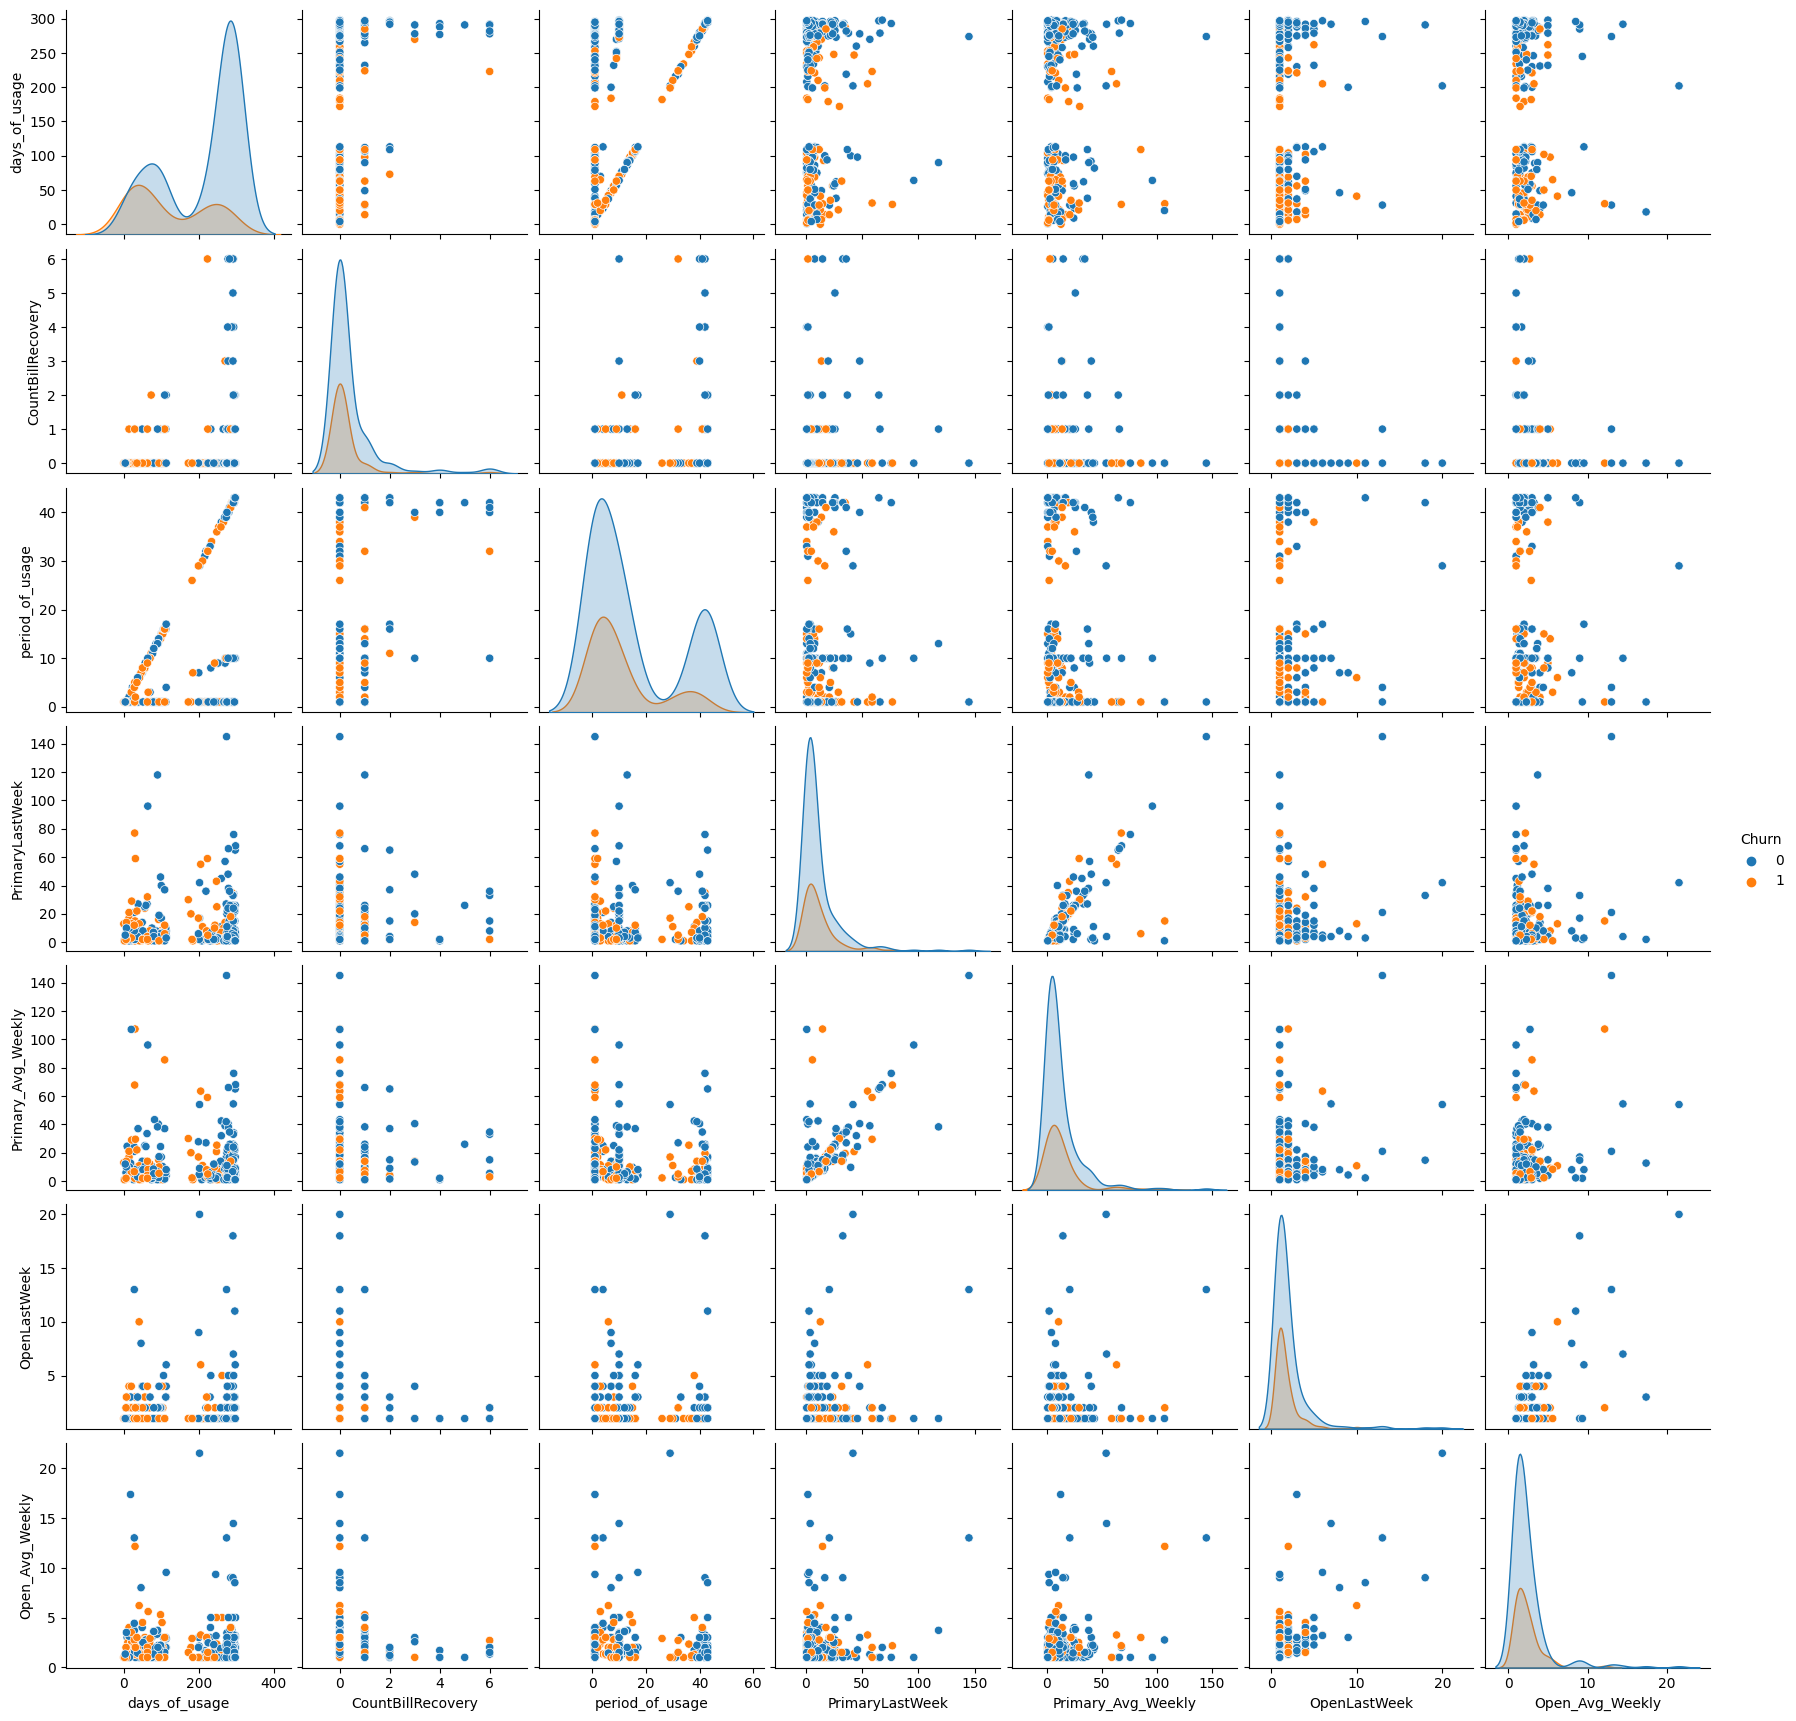

In [ ]:
sns.pairplot(df, hue="Churn")
plt.show()
#Veri setindeki sayısal değişkenler arasındaki ilişkileri ve "Churn" sütununa göre veri dağılımını inceledim.

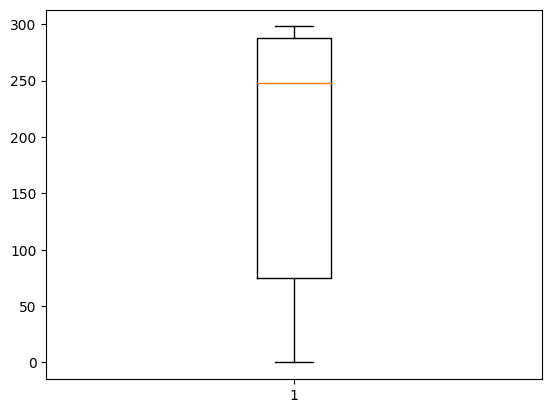

In [ ]:
plt.boxplot(df["days_of_usage"])
plt.show()
# Verilerin dağılımını ve olası aykırı değerleri görselleştirmek için boxplot kullandım.

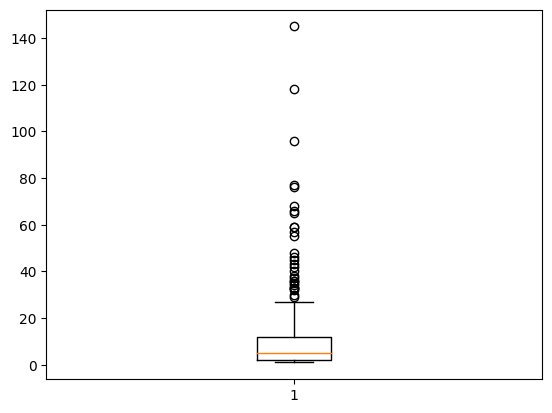

In [ ]:
plt.boxplot(df["PrimaryLastWeek"])
plt.show()

# **Recency- Frequency Analysis (RFM)**

Müşteri segnentasyonu için RFM analizini kullandım.Fakat mevcut verileri kullandığımda monetary ile çıkan sonuç(segmentasyon) tutarsız olduğu için analizi yalnızca Recency ve Frequency metrikleri ile yaptım.

In [ ]:
# RFM değerlerini hesapladım
rfm = df.groupby('userId').agg({
    'days_of_usage': 'max',            # Recency
    'Primary_Avg_Weekly': 'mean',      # Frequency
})

rfm.columns = ['Recency', 'Frequency']
rfm['Churn'] = df.groupby('userId')['Churn'].max()

In [ ]:
rfm.shape

(305, 3)

In [ ]:
rfm.duplicated().any()

True

In [ ]:
rfm["Recency"].quantile(q = [.25,.5,.75])

0.25     75.0
0.50    248.0
0.75    288.0
Name: Recency, dtype: float64

In [ ]:
rfm["Frequency"].quantile(q = [.25,.5,.75])

0.25     2.333333
0.50     6.500000
0.75    14.000000
Name: Frequency, dtype: float64

In [ ]:
def recency_scoring(data):
    if data["Recency"] <= 75.0:
        return 4
    elif data["Recency"] <= 248.0:
        return 3
    elif data["Recency"] <= 288.0:
        return 2
    else:
        return 1


def frequency_scoring(data):
    if data.Frequency <= 2.333333:
        return 1
    elif data.Frequency <= 6.500000:
        return 2
    elif data.Frequency <= 14.000000:
        return 3
    else:
        return 4

In [ ]:
# Recency ve Frequency değerlerini skorladım.
rfm['recency_quantile'] = rfm.apply(recency_scoring, axis=1)
rfm['frequency_quantile'] = rfm.apply(frequency_scoring, axis=1)

# RF skorunu hesapladım.
rfm['rf_score'] = rfm.apply(lambda row: str(int(row['recency_quantile'])) + str(int(row['frequency_quantile'])), axis=1)
rfm['rf_level'] = rfm['recency_quantile'] + rfm['frequency_quantile']

# Segmentleri Gold, Silver, Bronze olarak belirledim.
def segments(df):
    if df['Churn'] == 1:
        return 'Churned'
    elif df['rf_level'] >= 7: # 7 ve üzeri RFM skoru olanlar Gold segmentinde
        return 'Gold'
    elif (df['rf_level'] >= 4) and (df['rf_level'] < 7): # 4-6 arası Silver segmentinde
        return 'Silver'
    else: # 2-3 arası Bronze segmentinde
        return 'Bronze'

rfm['Segment'] = rfm.apply(segments, axis=1)

In [ ]:
# En düşük RFM skoru
min_rfm_score = rfm['rf_level'].min()

# En yüksek RFM skoru
max_rfm_score = rfm['rf_level'].max()

print("En düşük RFM skoru:", min_rfm_score)
print("En yüksek RFM skoru:", max_rfm_score)

En düşük RFM skoru: 2
En yüksek RFM skoru: 8


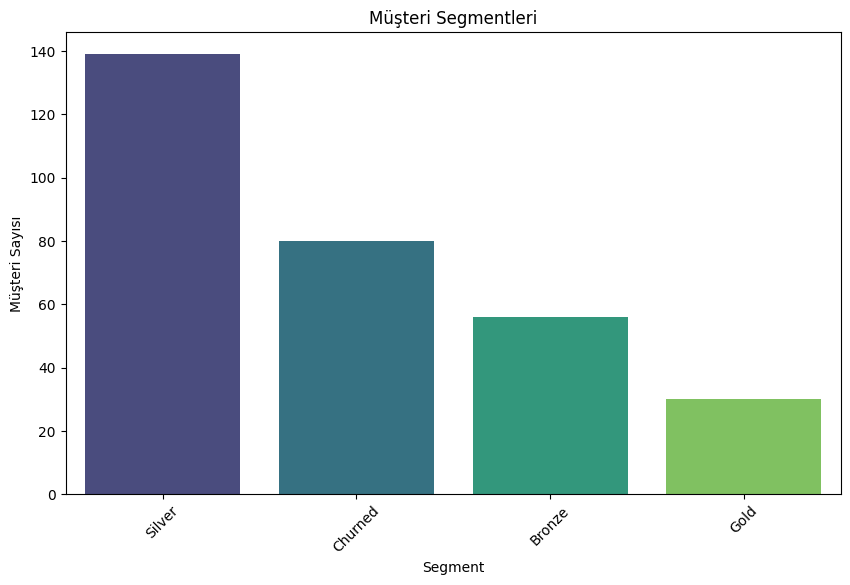

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")

plt.title('Müşteri Segmentleri')
plt.xlabel('Segment')
plt.ylabel('Müşteri Sayısı')
plt.xticks(rotation=45)
plt.show()

In [ ]:
segment_counts = rfm['Segment'].value_counts()
print(segment_counts)

Silver     139
Churned     80
Bronze      56
Gold        30
Name: Segment, dtype: int64


In [ ]:
def segment_mapping(row):
    if row['Segment'] == 'Churned':
        return 'Lost'
    elif row['Segment'] == 'Gold':
        return 'Champions'
    elif row['Segment'] == 'Silver':
        if (row['recency_quantile'] in [2, 3, 4]) and (row['frequency_quantile'] in [3, 4]):
            return 'Loyal Customers'
        elif (row['recency_quantile'] in [3, 4]) and (row['frequency_quantile'] in [2, 3]):
            return 'Potential Loyalist'
        else:
            return 'Customers Needing Attention'
    elif row['Segment'] == 'Bronze':
        if (row['recency_quantile'] in [2, 3]) and (row['frequency_quantile'] in [1, 2]):
            return 'Still Got Hope'
        elif (row['recency_quantile'] in [1, 2]) and (row['frequency_quantile'] in [3, 4]):
            return 'Need to Get Them Back'

        else:
            return 'Give it a Try'
rfm['Customer_Segment'] = rfm.apply(segment_mapping, axis=1)

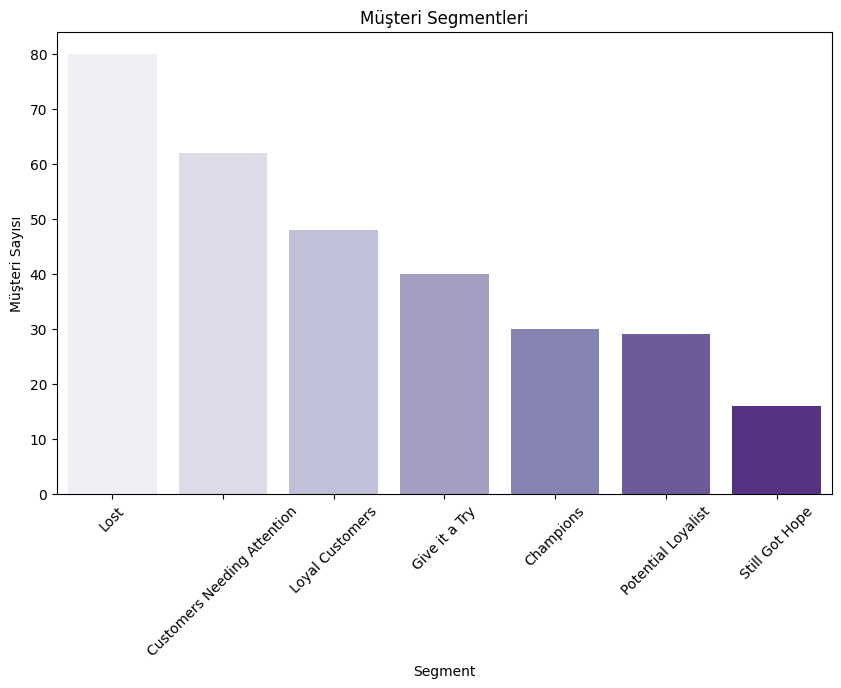

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

segment_counts = rfm['Customer_Segment'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="Purples")

plt.title('Müşteri Segmentleri')
plt.xlabel('Segment')
plt.ylabel('Müşteri Sayısı')
plt.xticks(rotation=45)
plt.show()
#Etiketlediğim müşteri segmentlerini gösterdim.

In [ ]:
segment_counts = rfm['Customer_Segment'].value_counts()
print(segment_counts)

Lost                           80
Customers Needing Attention    62
Loyal Customers                48
Give it a Try                  40
Champions                      30
Potential Loyalist             29
Still Got Hope                 16
Name: Customer_Segment, dtype: int64


In [ ]:
rfm
# Burada segmentlere ayırdığım ve etiketlediğim müşterileri userId lerine göre inceledim.

,Recency,Frequency,Churn,recency_quantile,frequency_quantile,rf_score,rf_level,Segment,Customer_Segment
userId,,,,,,,,,
002F4A9D-4EA4-418B-A54F-B9EBDAA33384,100,9.714286,0,3,3,33,6,Silver,Loyal Customers
01237E20-1E43-4763-9B63-E7FD3F75680D,262,7.000000,1,2,3,23,5,Churned,Lost
020B3799-DFE8-435D-A6F8-F0590BC62F56,26,1.000000,0,4,1,41,5,Silver,Customers Needing Attention
027BEF4E-5E46-4D32-B0DD-77886CAA9F4D,7,2.000000,1,4,1,41,5,Churned,Lost
02BBC8DE-E641-489C-B808-B633E82478B4,98,9.000000,1,3,3,33,6,Churned,Lost
...,...,...,...,...,...,...,...,...,...
FEE9AF2D-B44A-4935-A81D-330E65461EDA,182,2.250000,1,3,1,31,4,Churned,Lost
FF23543F-8BE2-438B-BF0A-A233841D6342,240,12.000000,0,3,3,33,6,Silver,Loyal Customers
FF29E86A-FFDE-4CDF-A1E9-9884B01E76D4,224,5.000000,1,3,2,32,5,Churned,Lost


# One hot encoding

In [ ]:
# Tarih sütunlarını çıkardım.
data= df
df.drop(['originalTransaction Date', 'Churn Date', 'userId'], axis=1, inplace=True)

# Kategorik sütunlar için one-hot encoding yaptım.
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,days_of_usage,CountBillRecovery,Churn,period_of_usage,PrimaryLastWeek,Primary_Avg_Weekly,OpenLastWeek,Open_Avg_Weekly,Product Name_monthnointroductorynotrial,Product Name_monthv3,...,appVersion_7.3.2,appVersion_7.3.4,appVersion_7.3.6,appVersion_7.3.7,appVersion_7.3.8,appVersion_8.0.0,appVersion_8.0.1,appVersion_8.0.2,appVersion_8.1,appVersion_8.2
0,100,0,0,15,40,9.714286,1,1.142857,0,0,...,0,0,0,0,0,0,0,1,0,0
1,262,0,1,38,7,7.000000,5,5.000000,0,0,...,0,0,0,0,0,0,0,0,1,0
2,26,0,0,1,1,1.000000,2,2.000000,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7,0,1,1,1,2.000000,2,2.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
4,98,1,1,14,8,9.000000,2,5.285714,0,0,...,0,0,0,0,0,0,0,0,0,1


# Outliers

In [ ]:
for feature in df:

    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

days_of_usage no
CountBillRecovery yes
Churn no
period_of_usage no
PrimaryLastWeek yes
Primary_Avg_Weekly yes
OpenLastWeek yes
Open_Avg_Weekly yes
Product Name_monthnointroductorynotrial yes
Product Name_monthv3 yes
Product Name_sixmonthnointroductorynotrial yes
Product Name_threemonthnointroductorynotrial yes
Product Name_trialmonth20 yes
Product Name_trialweek no
Product Name_trialweekv2 no
Product Name_trialyear yes
Product Name_trialyearv2 no
Product Name_week yes
Product Name_weekly no
Product Name_yearlyv4 no
Product Name_yearlyv5 yes
Standard Subscription Duration_1 Year no
Standard Subscription Duration_3 Months yes
Standard Subscription Duration_6 Months yes
Standard Subscription Duration_7 Days no
Intro Type_S no
Intro Type_T no
Subscription Offer Duration_3 Days no
Subscription Offer Duration_Non Duration no
Subscription Offer Type_Non Offer no
Subscription Offer Type_Pay up front yes
region_AT yes
region_AU yes
region_BR yes
region_CA no
region_CH yes
region_CL yes
region_D

In [ ]:
columns = df.columns

# Her bir sütun için outlier işlemi yapın
for col in columns:
    Q1 = df[col].quantile(0.05)
    Q3 = df[col].quantile(0.95)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR

    # Outlier değerleri düzeltme
    df.loc[df[col] > upper, col] = upper


# Machine Learning Models

train test split

In [ ]:
# Özellik ve hedef değişkenleri belirledim.
X = df.drop('Churn', axis=1)
y = df['Churn']

# Veriyi eğitim ve test setlerine ayırdım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Özellik ölçeklendirme ile verileri normalize ettim.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
f1_train_list = []
f1_test_list = []

In [ ]:
models = {"Lojistik Regresyon": LogisticRegression(random_state=32,max_iter=10000),
          "CART": DecisionTreeClassifier(random_state=32),
          "Random Forests": RandomForestClassifier(random_state=32),
          "Gradient Boosting": GradientBoostingClassifier(random_state=32),
          "XGBoost": XGBClassifier(random_state=32, use_label_encoder=False),
          "Desicion Tree" : DecisionTreeClassifier(),
          "Light GBM": LGBMClassifier(random_state=32),
          "CatBoost": CatBoostClassifier(random_state=32, verbose=False),
          "Support Vector Machine_Lineer":  svm.SVC(kernel='linear', probability=True),
          "Support Vector Machine_Sigmoid": svm.SVC(kernel='sigmoid',probability=True),
          "Naive Bayes"  : GaussianNB(),
          "K-Nearest Neighbor": KNeighborsClassifier(n_neighbors=5)}


Lojistik Regresyon Confusion Matrix:
[[42  5]
 [ 8  6]]


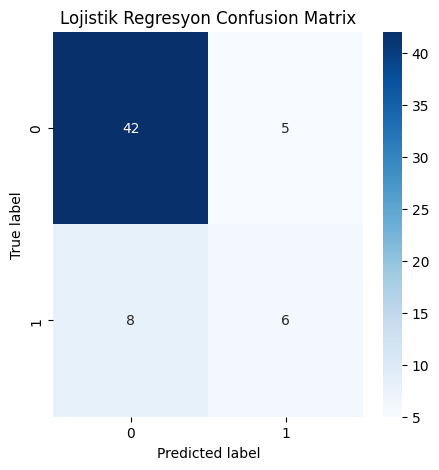

CART Confusion Matrix:
[[40  7]
 [ 7  7]]


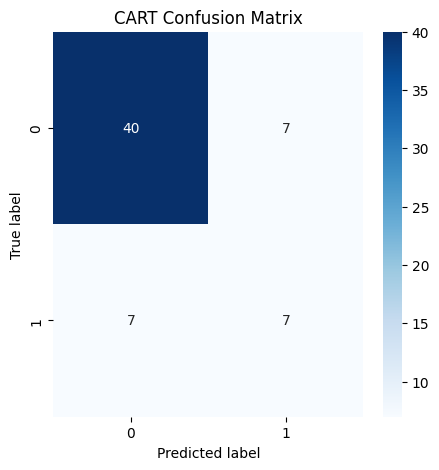

Random Forests Confusion Matrix:
[[43  4]
 [10  4]]


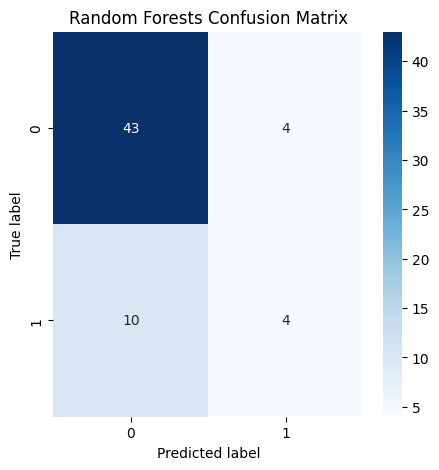

Gradient Boosting Confusion Matrix:
[[42  5]
 [ 4 10]]


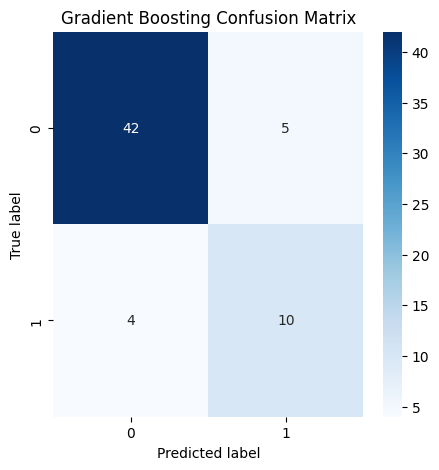

XGBoost Confusion Matrix:
[[43  4]
 [ 6  8]]


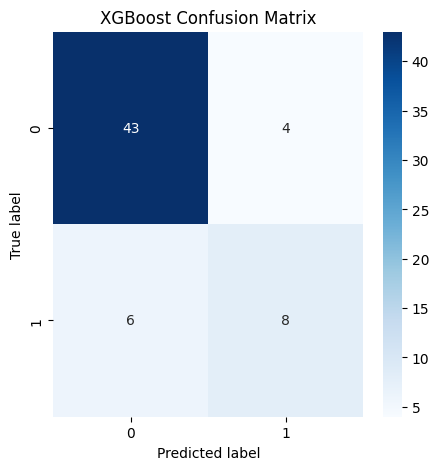

Desicion Tree Confusion Matrix:
[[39  8]
 [ 5  9]]


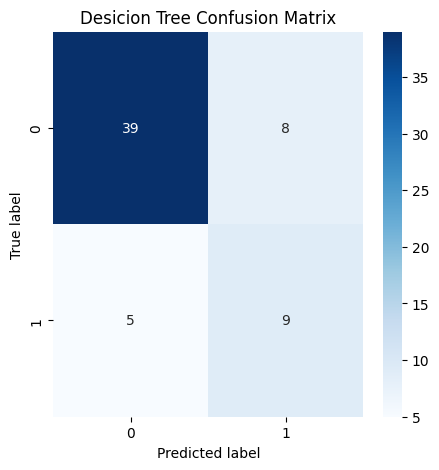

Light GBM Confusion Matrix:
[[42  5]
 [ 5  9]]


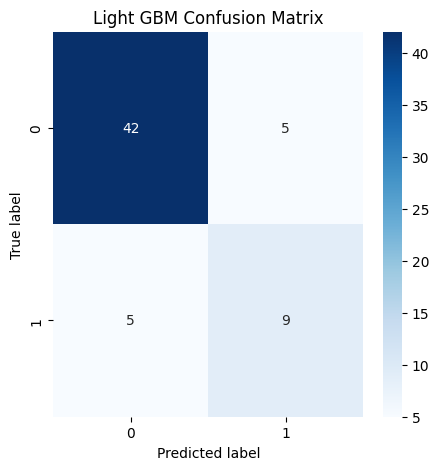

CatBoost Confusion Matrix:
[[41  6]
 [ 7  7]]


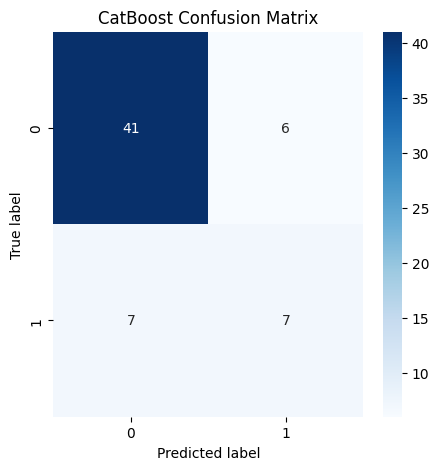

Support Vector Machine_Lineer Confusion Matrix:
[[41  6]
 [ 7  7]]


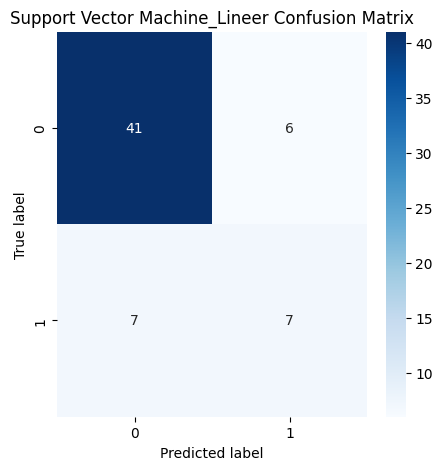

Support Vector Machine_Sigmoid Confusion Matrix:
[[42  5]
 [10  4]]


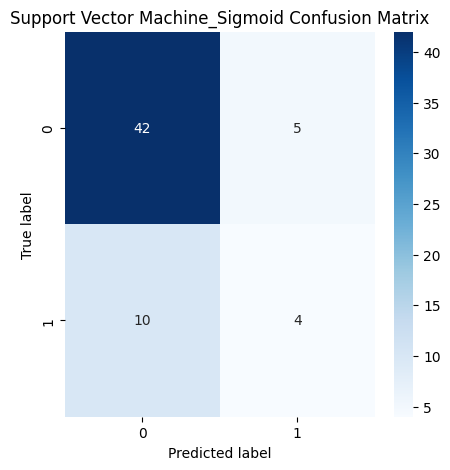

Naive Bayes Confusion Matrix:
[[33 14]
 [ 6  8]]


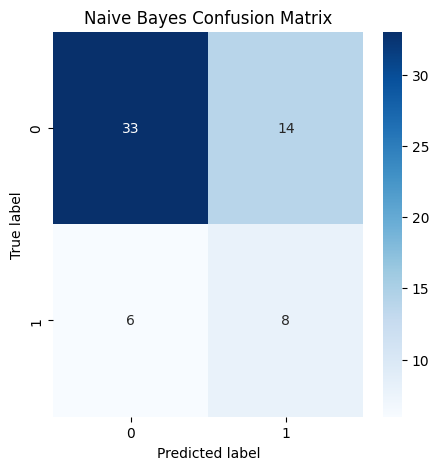

K-Nearest Neighbor Confusion Matrix:
[[45  2]
 [10  4]]


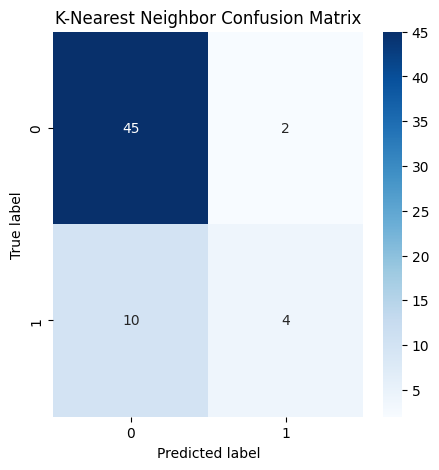

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)

    print(f"{name} Confusion Matrix:")
    print(cm)

    # Confusion matrisini görselleştir
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Lojistik Regresyon Model Test Accuracy: 0.7868852459016393

Lojistik Regresyon Model Test f1_score: 0.4799999999999999
Lojistik Regresyon Model Test recall: 0.42857142857142855
CART Model Test Accuracy: 0.7704918032786885

CART Model Test f1_score: 0.5
CART Model Test recall: 0.5
Random Forests Model Test Accuracy: 0.7704918032786885

Random Forests Model Test f1_score: 0.36363636363636365
Random Forests Model Test recall: 0.2857142857142857
Gradient Boosting Model Test Accuracy: 0.8524590163934426

Gradient Boosting Model Test f1_score: 0.689655172413793
Gradient Boosting Model Test recall: 0.7142857142857143
XGBoost Model Test Accuracy: 0.8360655737704918

XGBoost Model Test f1_score: 0.6153846153846153
XGBoost Model Test recall: 0.5714285714285714
Desicion Tree Model Test Accuracy: 0.7868852459016393

Desicion Tree Model Test f1_score: 0.5185185185185186
Desicion Tree Model Test recall: 0.5
Light GBM Model Test Accuracy: 0.8360655737704918

Light GBM Model Test f1_score: 0.642857142

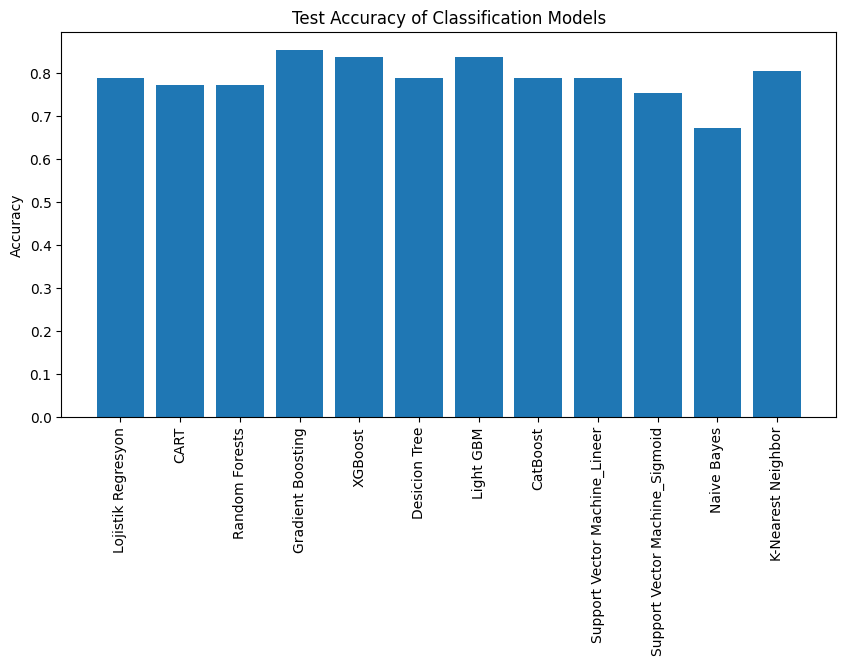

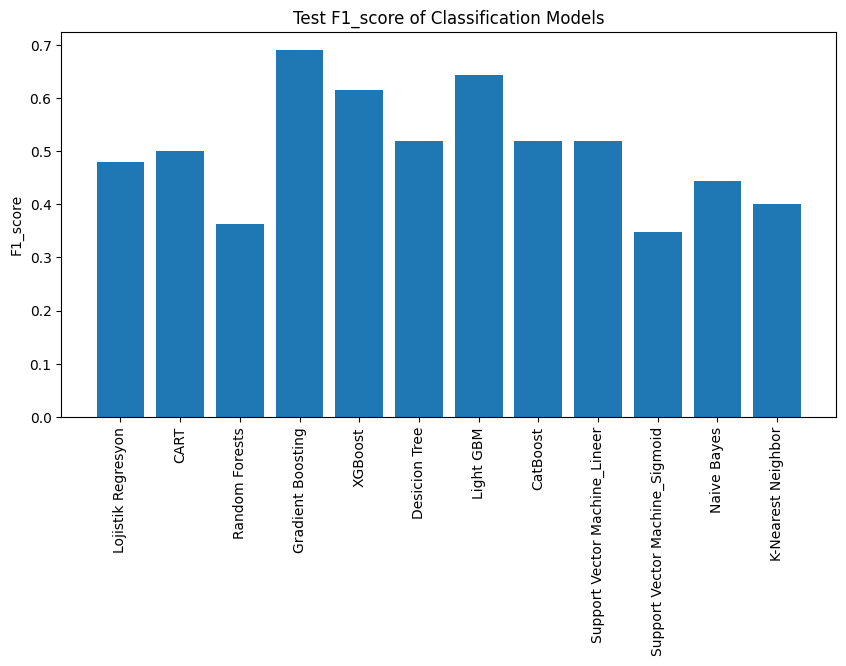

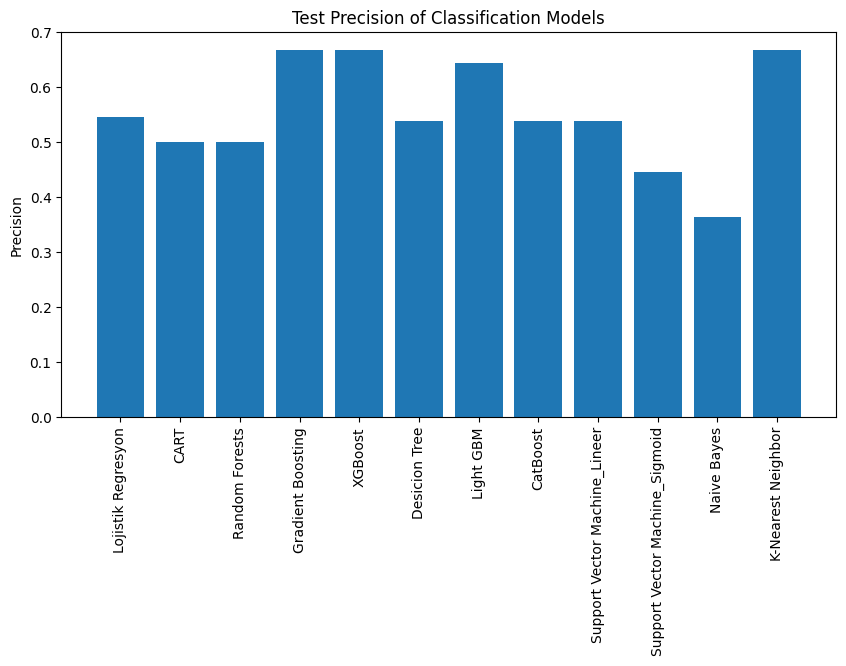

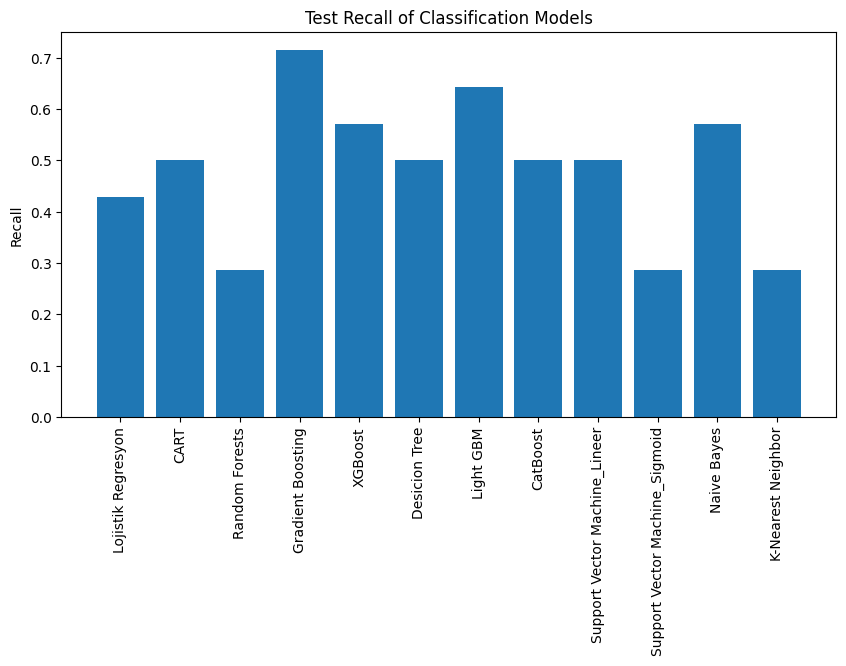

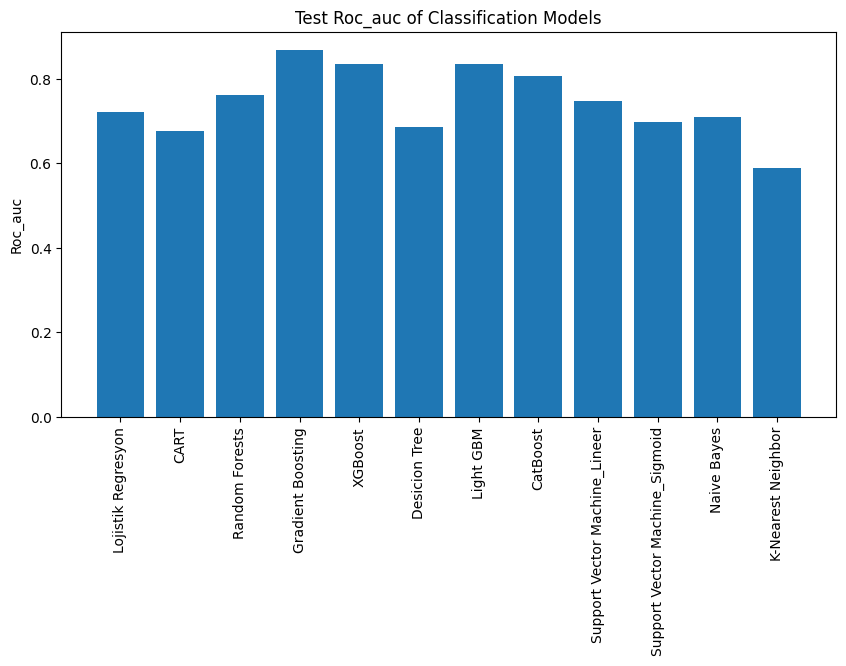

In [ ]:
# Metrics to keep track
metrics_train = {
    'accuracy': [],
    'f1_score': [],
    'precision': [],
    'recall': [],
    'roc_auc': []
}
metrics_test = {
    'accuracy': [],
    'f1_score': [],
    'precision': [],
    'recall': [],
    'roc_auc': []
}

# Training and evaluating models
for key, model in models.items():
    model.fit(X_train, y_train)


    y_pred_train = model.predict(X_train)
    y_score_train = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_train)

    y_pred_test = model.predict(X_test)
    y_score_test = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    metrics_train['accuracy'].append(accuracy_score(y_train, y_pred_train))
    metrics_train['f1_score'].append(f1_score(y_train, y_pred_train))
    metrics_train['precision'].append(precision_score(y_train, y_pred_train))
    metrics_train['recall'].append(recall_score(y_train, y_pred_train))
    metrics_train['roc_auc'].append(roc_auc_score(y_train, y_score_train))

    metrics_test['accuracy'].append(accuracy_score(y_test, y_pred_test))
    metrics_test['f1_score'].append(f1_score(y_test, y_pred_test))
    metrics_test['precision'].append(precision_score(y_test, y_pred_test))
    metrics_test['recall'].append(recall_score(y_test, y_pred_test))
    metrics_test['roc_auc'].append(roc_auc_score(y_test, y_score_test))


    print(f"{key} Model Test Accuracy: {metrics_test['accuracy'][-1]}\n")
    print(f"{key} Model Test f1_score: {metrics_test['f1_score'][-1]}")
    print(f"{key} Model Test recall: {metrics_test['recall'][-1]}")

for metric in metrics_test.keys():
    plt.figure(figsize=(10,5))
    plt.bar(models.keys(), metrics_test[metric])
    plt.title(f"Test {metric.capitalize()} of Classification Models")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=90)
    plt.show()


F1 Score and Accuracy were chosen as the most appropriate metrics for Model Selection. F1 score takes into account both the accuracy of the positively predicted samples (Precision) and how many true positive samples are captured (Recall). Accuracy provides information about how accurate the model predicts.